# Credit Score Classification: Case Study

The credit score of a person determines the creditworthiness of the person. It helps financial companies determine if you can repay the loan or credit you are applying for.

Here is a dataset based on the credit score classification submitted by Rohan Paris on Kaggle. Below are all the features in the dataset:

* ID: Unique ID of the record
* Customer_ID: Unique ID of the customer
* Month: Month of the year
* Name: The name of the person
* Age: The age of the person
* SSN: Social Security Number of the person
* Occupation: The occupation of the person
* Annual_Income: The Annual Income of the person
* Monthly_Inhand_Salary: Monthly in-hand salary of the person
* Num_Bank_Accounts: The number of bank accounts of the person
* Num_Credit_Card: Number of credit cards the person is having
* Interest_Rate: The interest rate on the credit card of the person
* Num_of_Loan: The number of loans taken by the person from the bank
* Type_of_Loan: The types of loans taken by the person from the bank
* Delay_from_due_date: The average number of days delayed by the person from the date of payment
* Num_of_Delayed_Payment: Number of payments delayed by the person
* Changed_Credit_Card: The percentage change in the credit card limit of the person
* Num_Credit_Inquiries: The number of credit card inquiries by the person
* Credit_Mix: Classification of Credit Mix of the customer
* Outstanding_Debt: The outstanding balance of the person
* Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
* Credit_History_Age: The age of the credit history of the person
* Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
* Total_EMI_per_month: The total EMI per month of the person
* Amount_invested_monthly: The monthly amount invested by the person
* Payment_Behaviour: The payment behaviour of the person
* Monthly_Balance: The monthly balance left in the account of the person
* Credit_Score: The credit score of the person

The Credit_Score column is the target variable in this problem. You are required to find relationships based on how banks classify credit scores and train a model to classify the credit score of a person.

In [1]:
import pandas as pd
import numpy as np
import os
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (8,6)}
)


In [2]:
# get current working directory
os.getcwd()

'c:\\Users\\kings\\OneDrive - MMU\\Downloads\\new projects\\Credit-Score-Data'

### Load Data

In [3]:
def get_data(file):
    current_directory = os.getcwd()
    file_path = current_directory + "\\Credit Score Data\\"
    return pd.read_csv(file_path + file)

In [4]:
df = get_data('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
# check the shape of the dataset
df.shape

(100000, 28)

In [7]:
# check for missing values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
# set id column as index
df = df.set_index(df['ID']).drop(columns=['ID'])

In [9]:
# check for duplicated entries
df[df.duplicated()]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,


# Data/Domain Understanding and Exploration 

In [10]:
# quick check of descriptive statistics of numerical features
df.describe()

,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [11]:
# quick check of descriptive statistics of categorical features
df.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


In [12]:
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
# number of unique values in each column
columns = df.columns
for col in range(len(columns)):
    n_unique = df[columns[col]].nunique()
    print(f"There are {n_unique} uniques {' '.join(columns[col].split('_'))}s in {columns[col]} column")

There are 12500 uniques Customer IDs in Customer_ID column
There are 8 uniques Months in Month column
There are 10128 uniques Names in Name column
There are 43 uniques Ages in Age column
There are 12500 uniques SSNs in SSN column
There are 15 uniques Occupations in Occupation column
There are 12488 uniques Annual Incomes in Annual_Income column
There are 13241 uniques Monthly Inhand Salarys in Monthly_Inhand_Salary column
There are 12 uniques Num Bank Accountss in Num_Bank_Accounts column
There are 12 uniques Num Credit Cards in Num_Credit_Card column
There are 34 uniques Interest Rates in Interest_Rate column
There are 10 uniques Num of Loans in Num_of_Loan column
There are 6261 uniques Type of Loans in Type_of_Loan column
There are 63 uniques Delay from due dates in Delay_from_due_date column
There are 26 uniques Num of Delayed Payments in Num_of_Delayed_Payment column
There are 3452 uniques Changed Credit Limits in Changed_Credit_Limit column
There are 18 uniques Num Credit Inquirie

In [14]:
target = df['Credit_Score']

In [15]:
target.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [16]:
df['Month'].value_counts()

1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64

In [17]:
# get the categorical and numerial features int seperate lists
cat_feat = [i for i in columns if df[i].dtype=='O']
num_feat = [ i for i in columns if i not in cat_feat]
cat_feat, num_feat

(['Name',
  'Occupation',
  'Type_of_Loan',
  'Credit_Mix',
  'Payment_of_Min_Amount',
  'Payment_Behaviour',
  'Credit_Score'],
 ['Customer_ID',
  'Month',
  'Age',
  'SSN',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Num_Credit_Card',
  'Interest_Rate',
  'Num_of_Loan',
  'Delay_from_due_date',
  'Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Num_Credit_Inquiries',
  'Outstanding_Debt',
  'Credit_Utilization_Ratio',
  'Credit_History_Age',
  'Total_EMI_per_month',
  'Amount_invested_monthly',
  'Monthly_Balance'])

In [18]:
def plot_boxplot(df, col, target):
    """
    Returns a box plot by taking in three arguements:
        df: The dataframe 
        col: The column of interest
        target: The target column.
    """
    plt.figure(figsize=(8, 5))
    feature = df[col]
    target = df[target]
    sns.boxplot(data=df, y=feature, x=target)
    plt.title(col)    
    plt.show()
    
def plot_displot(df, col, extra_col=None, hue=None):
    """
    Returns a distribution plot by taking in two complusory keywords
    and two optional arguements:
        df: The dataframe 
        col: The column of interest
        extra_col:  Variables that define subsets to plot on different facets
        hue: This parameter takes a column name for colour encoding.
    """
    feature = df[col]
    ax1 = sns.displot(data=df, x=feature, hue=hue,col=extra_col,height=5, aspect=1.5,kde=True)
    ax1.fig.subplots_adjust(top=.8)
    ax1.fig.suptitle('Distribution of ' + col)
    plt.show()

#### `Age`

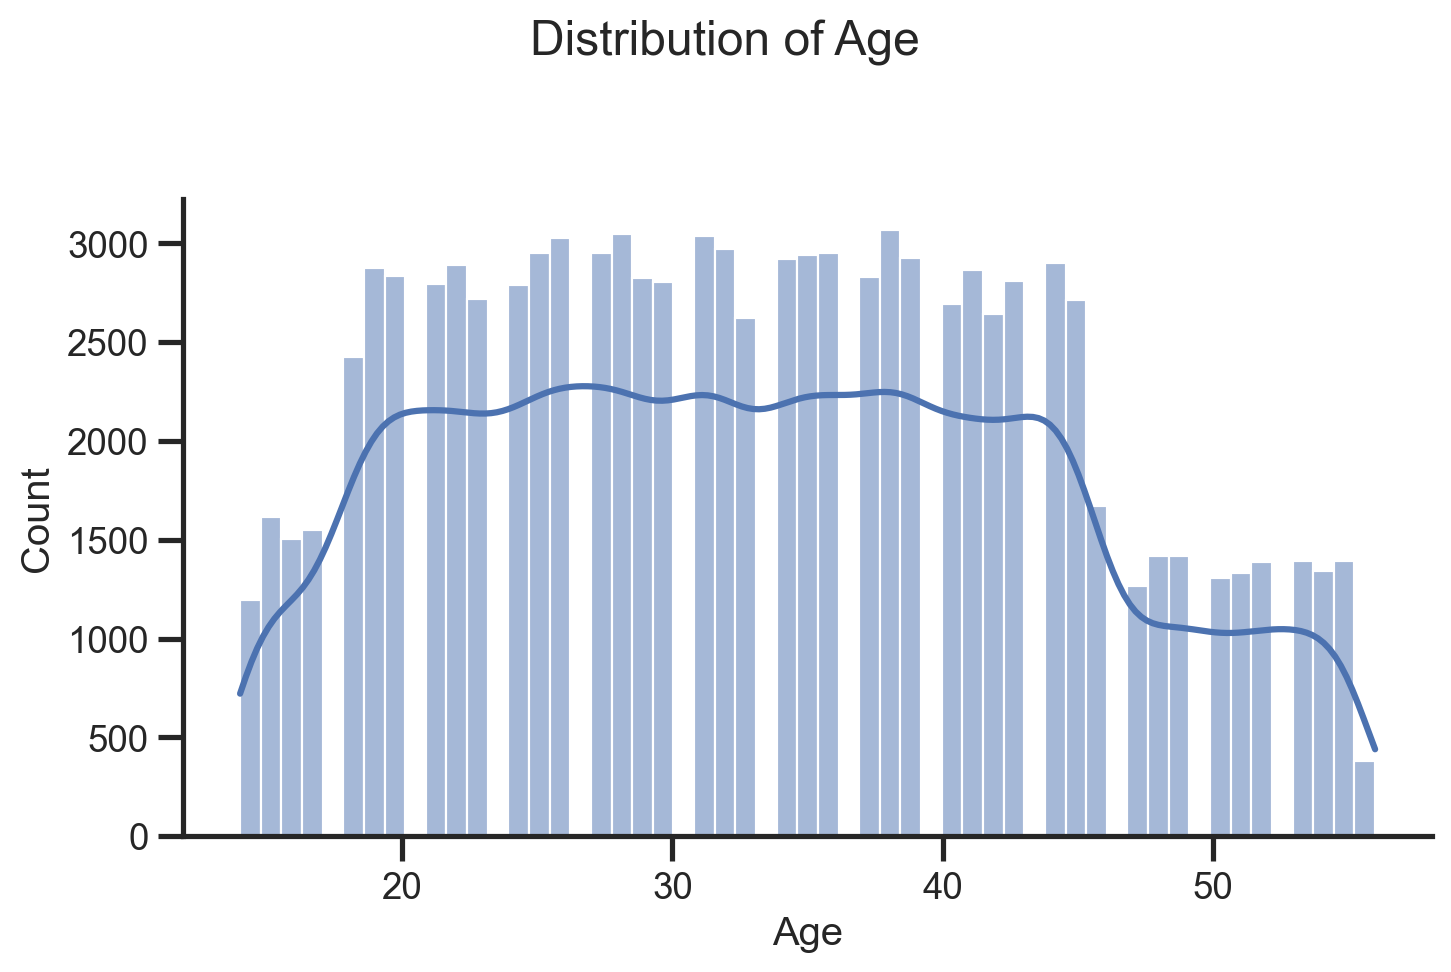

In [19]:
plot_displot(df, 'Age')

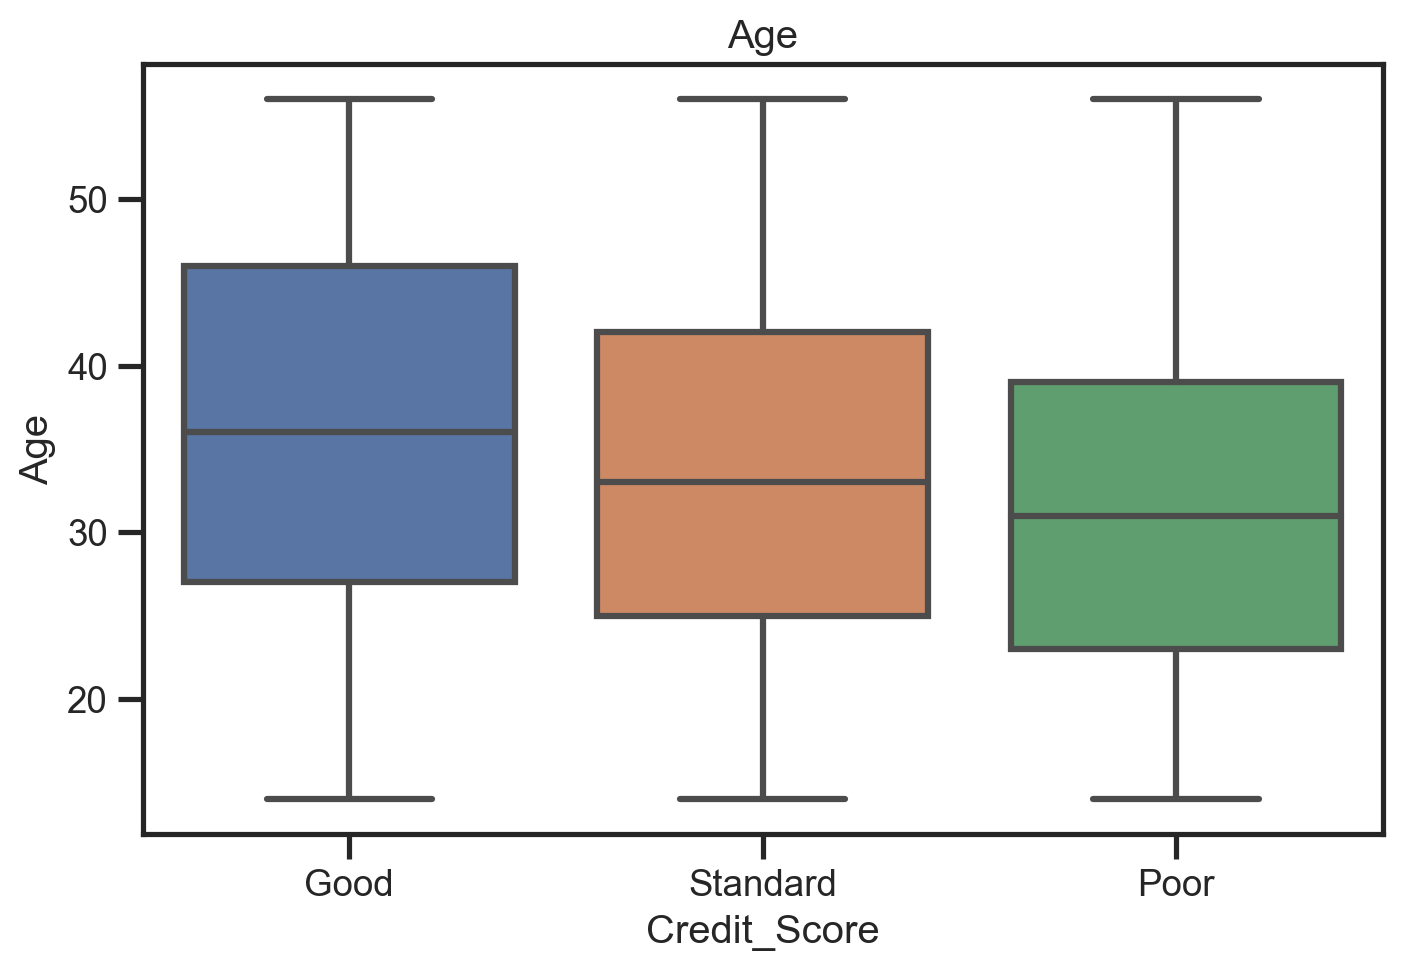

In [20]:
plot_boxplot(df, 'Age','Credit_Score')

#### `Occupation`

In [21]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

#### `Annual_Income and Monthly_Inhand_Salary`

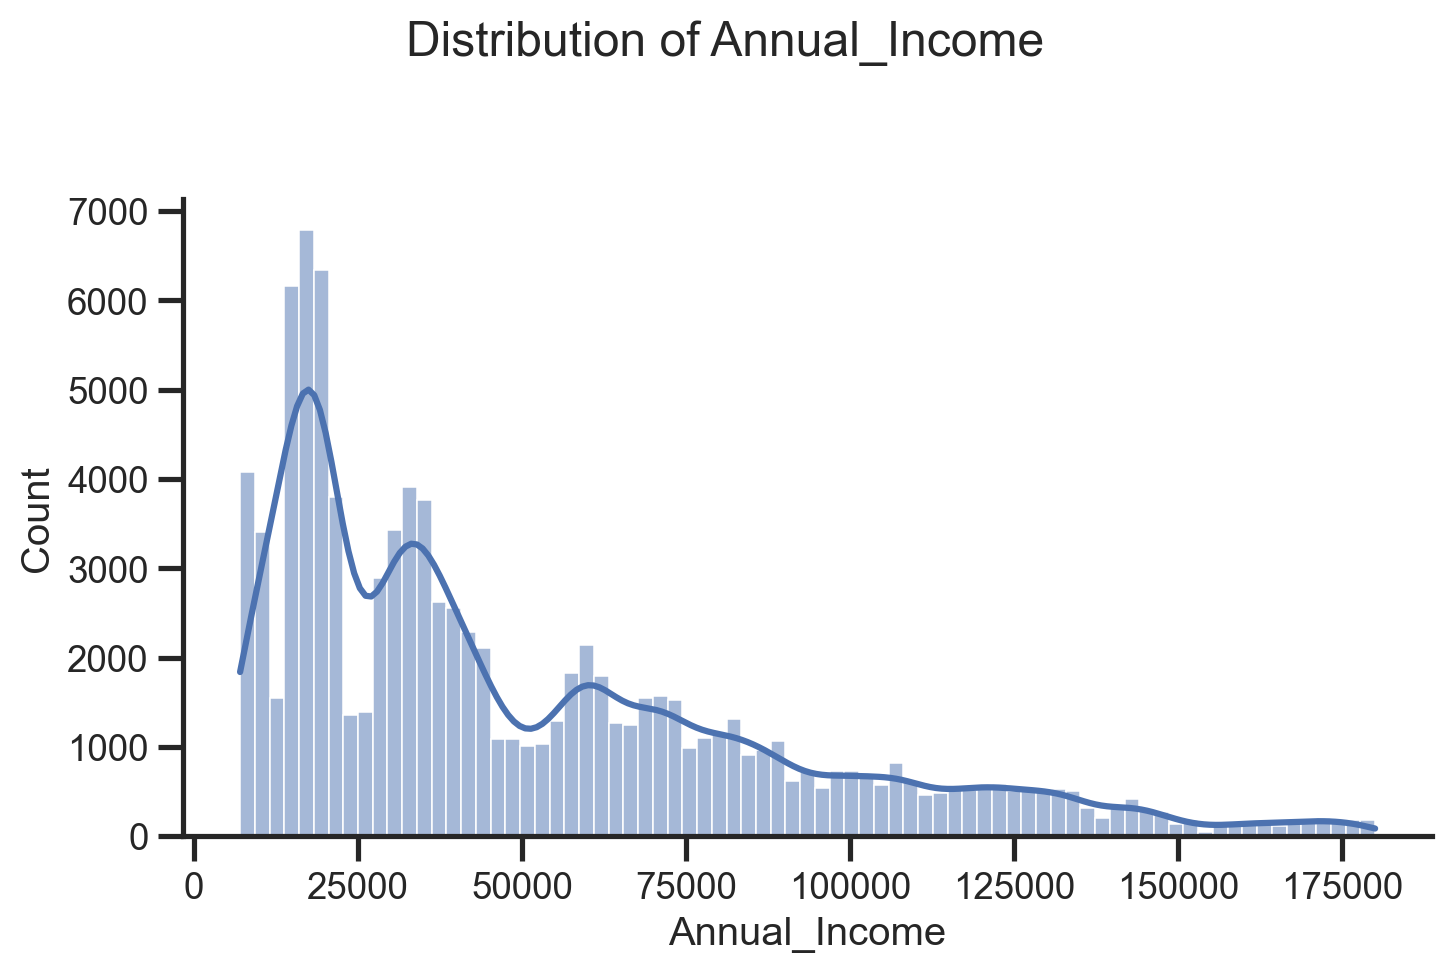

In [22]:
plot_displot(df, "Annual_Income")

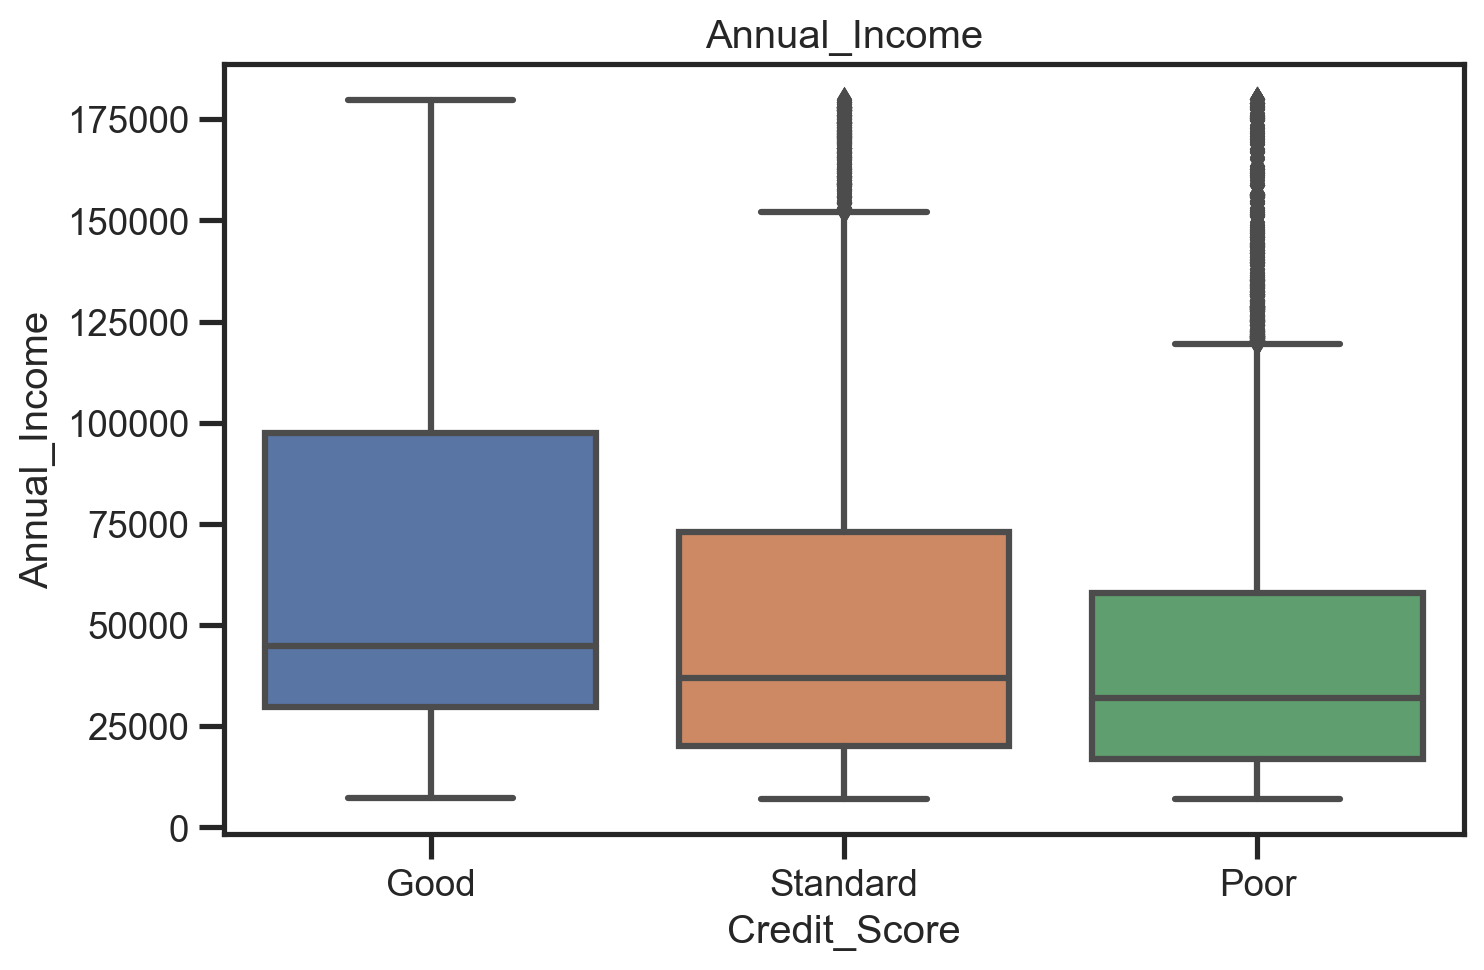

In [23]:
plot_boxplot(df, "Annual_Income","Credit_Score")

From the plots above,the distribution of `Annual_Income` is a right-skewed distribution, that is when the chart's tail is longer on its right side. Most right-skewed distributions have the mean to the be greater than the median. Also there's a relationship between `Annual_Income` and each category of credit score. This is not surprising because the more you earn, there's a tendency for the customer to have a good-standard credit score. However, we have some oultiers for the standard and poor credit score categories which may imply that it's very rare to have a high income and a "not good" credit score.

#### `Num_Bank_Accounts`

In [24]:
df["Num_Bank_Accounts"].value_counts()

6.0     13175
7.0     12999
8.0     12940
4.0     12343
5.0     12298
3.0     12107
9.0      5503
10.0     5329
1.0      4540
0.0      4417
2.0      4340
11.0        9
Name: Num_Bank_Accounts, dtype: int64

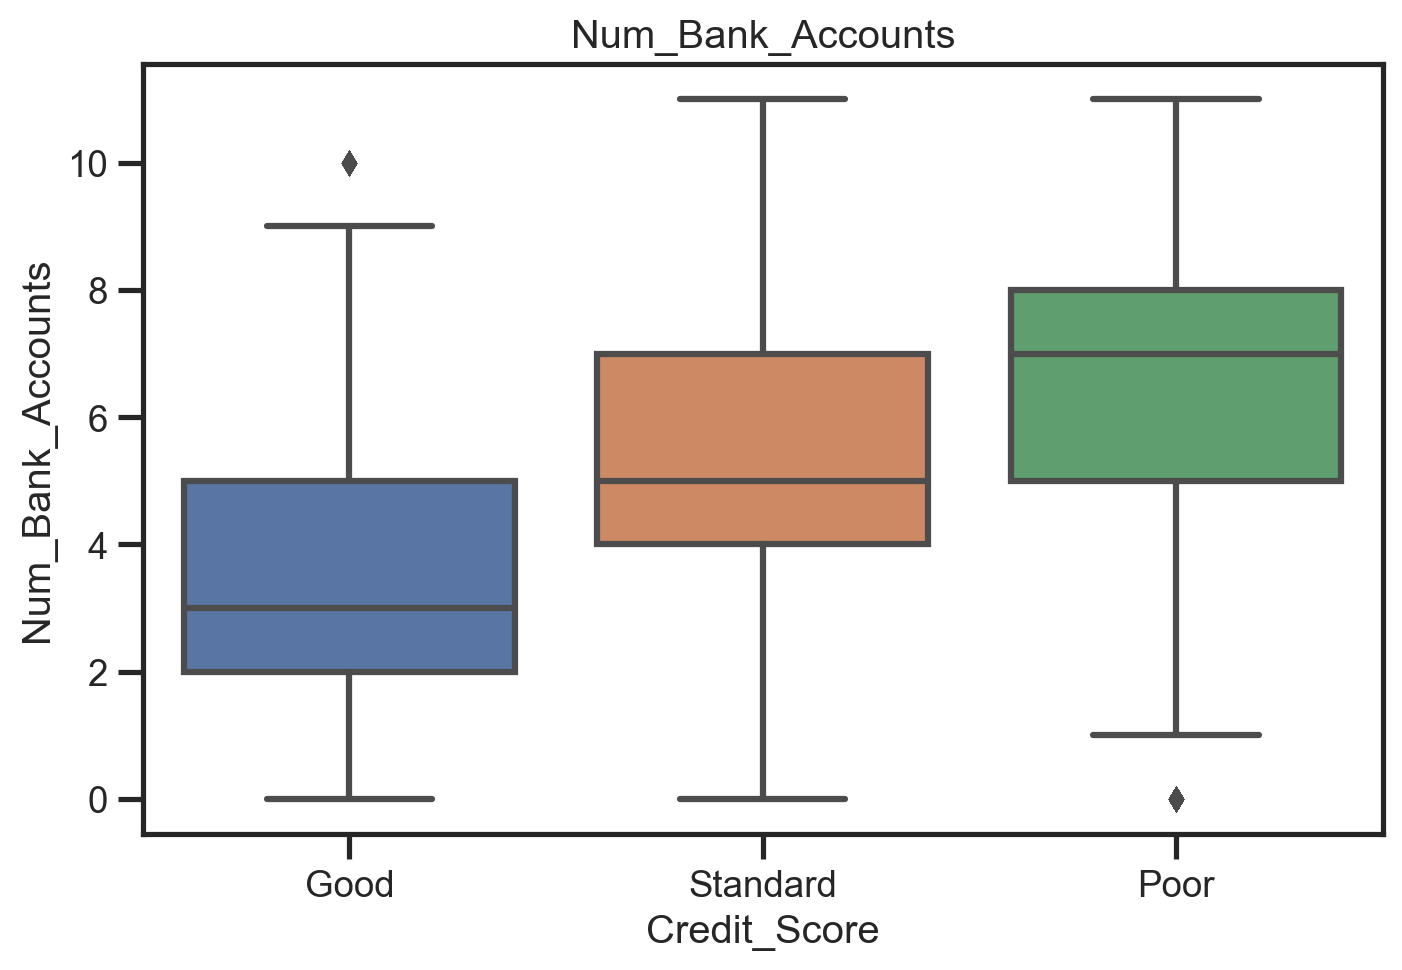

In [25]:
plot_boxplot(df, "Num_Bank_Accounts", "Credit_Score")

The boxplot above indicates that owning few bank accounts(minimum 4) tends to give you a ***GOOD*** credit score rating than owning more than 5.

#### `Num_Credit_Card`

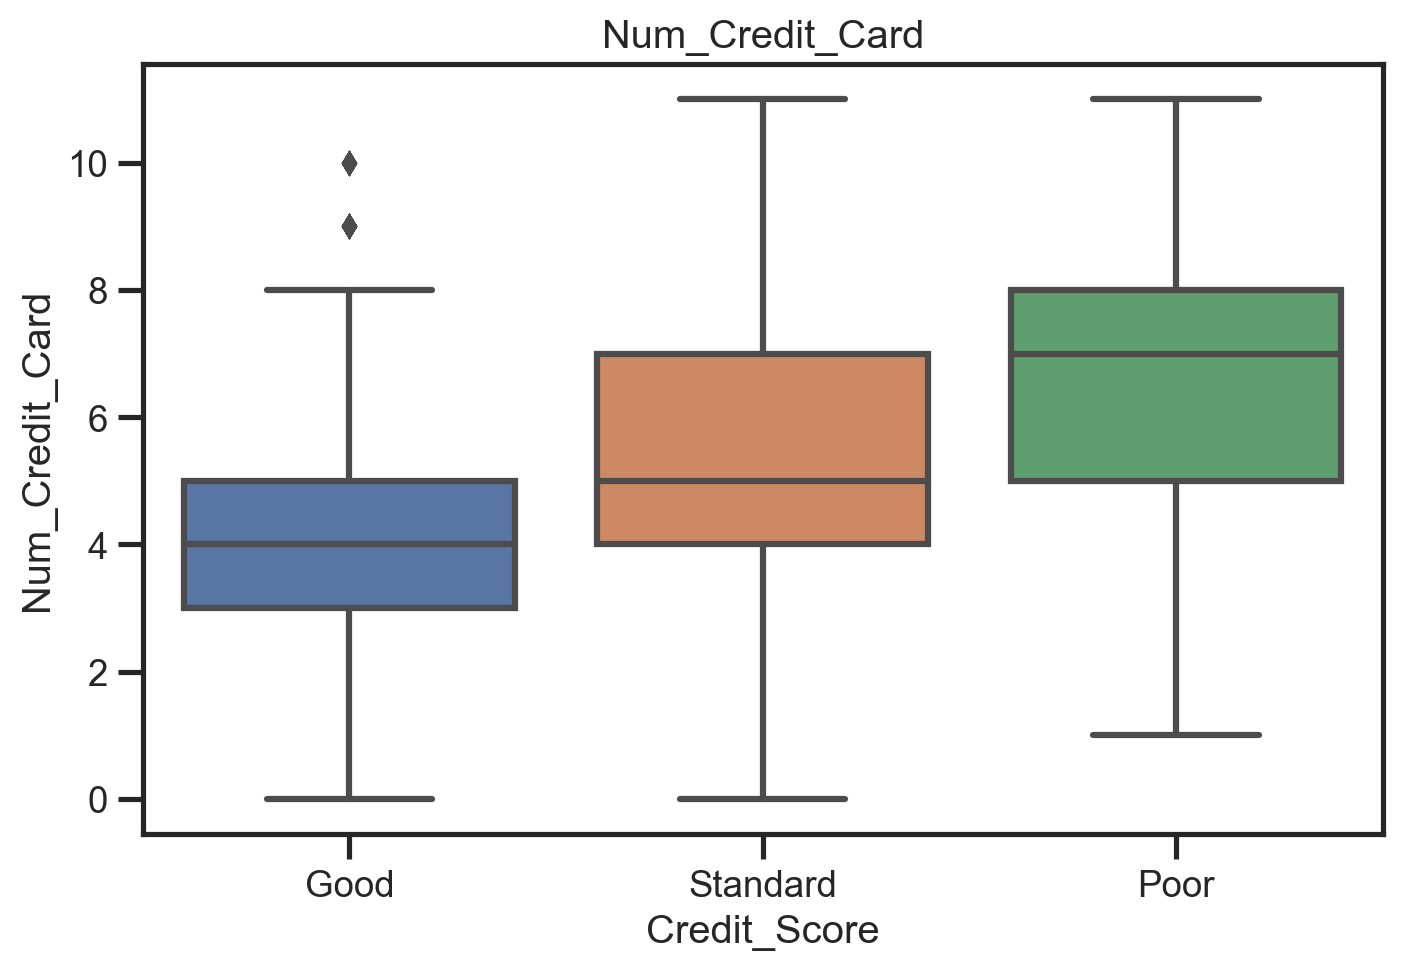

In [26]:
plot_boxplot(df, "Num_Credit_Card", "Credit_Score")

Owning few credit cards gives own a ***GOOD*** credit score rating.

#### `Interest_Rate`

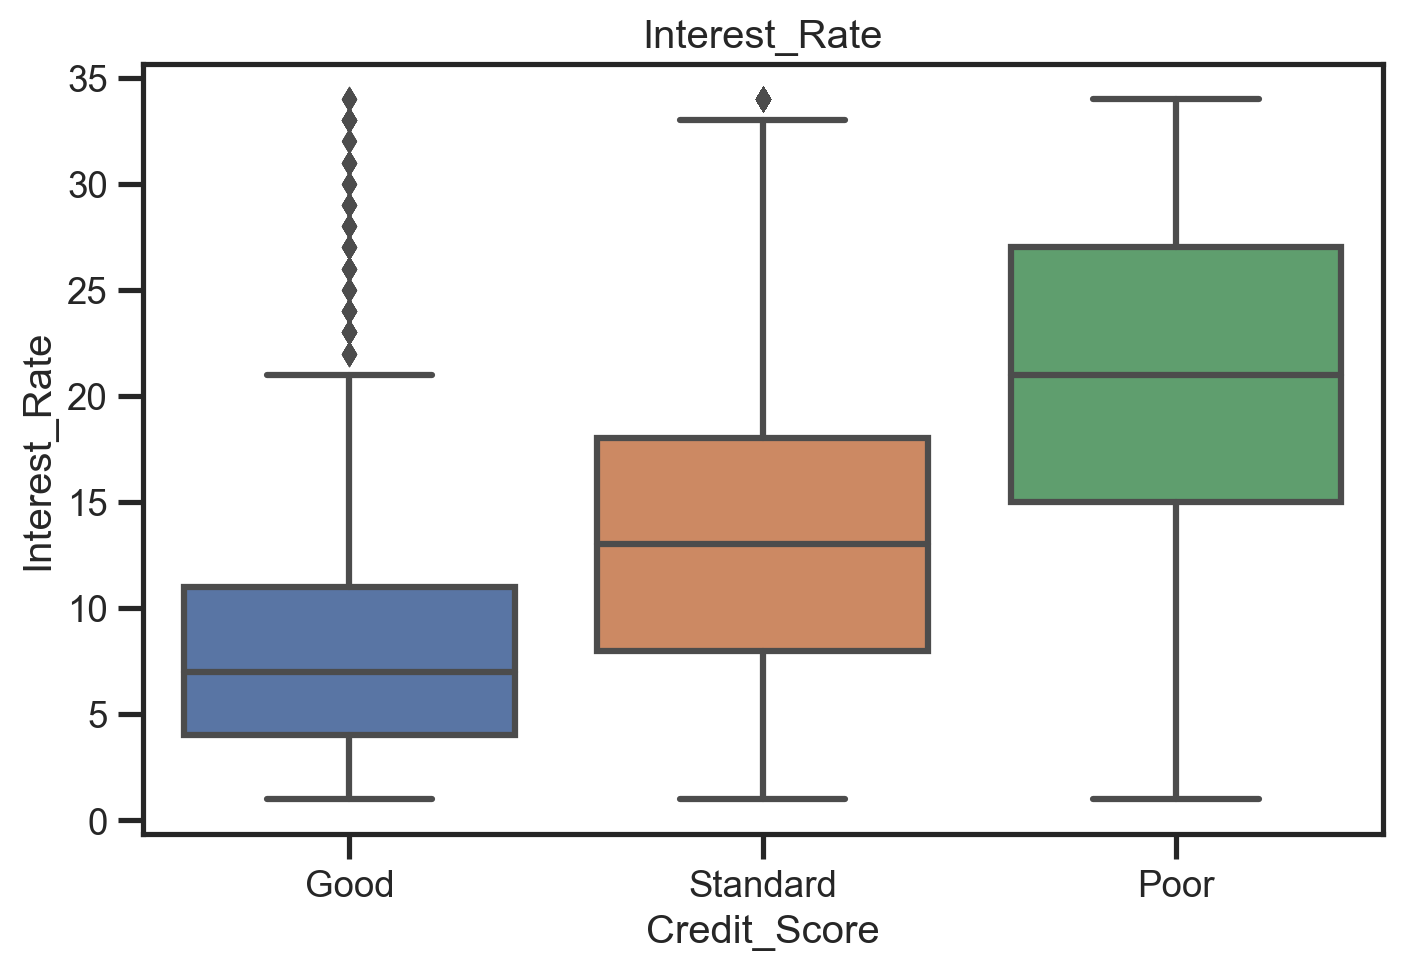

In [27]:
plot_boxplot(df, "Interest_Rate", "Credit_Score")

In [28]:
round(len(df[df["Num_Bank_Accounts"]==df["Num_Credit_Card"]]) /len(df) *100, 2)
# % where num of bank account is equal to the num of credit cards

15.4

#### `Delay_from_due_date`

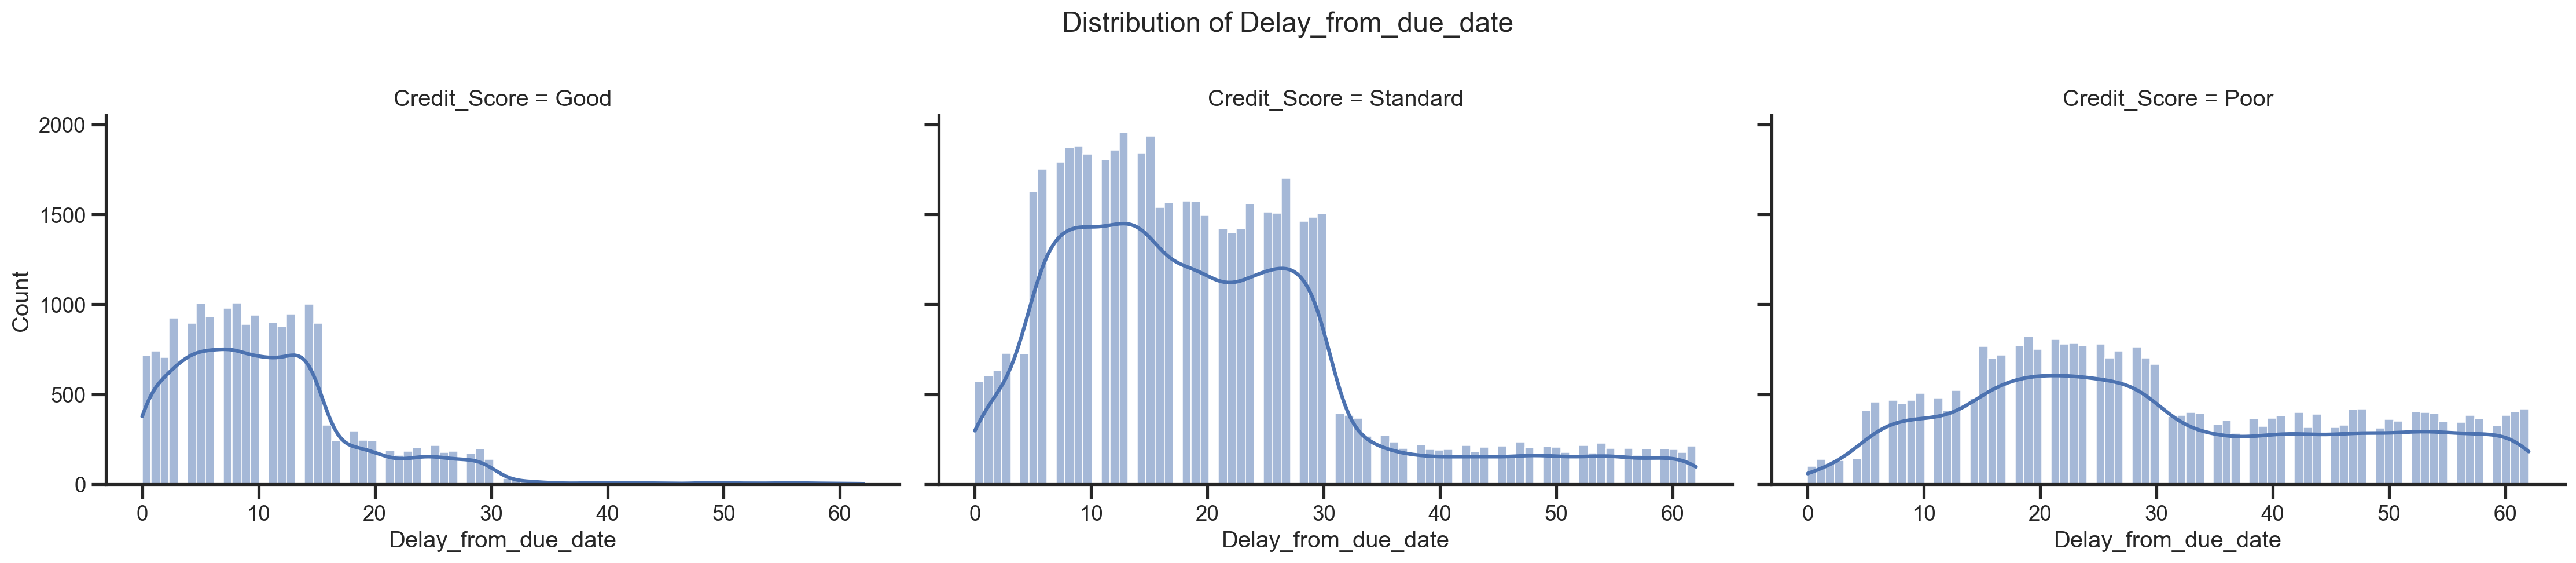

In [29]:
plot_displot(df, 'Delay_from_due_date', 'Credit_Score')

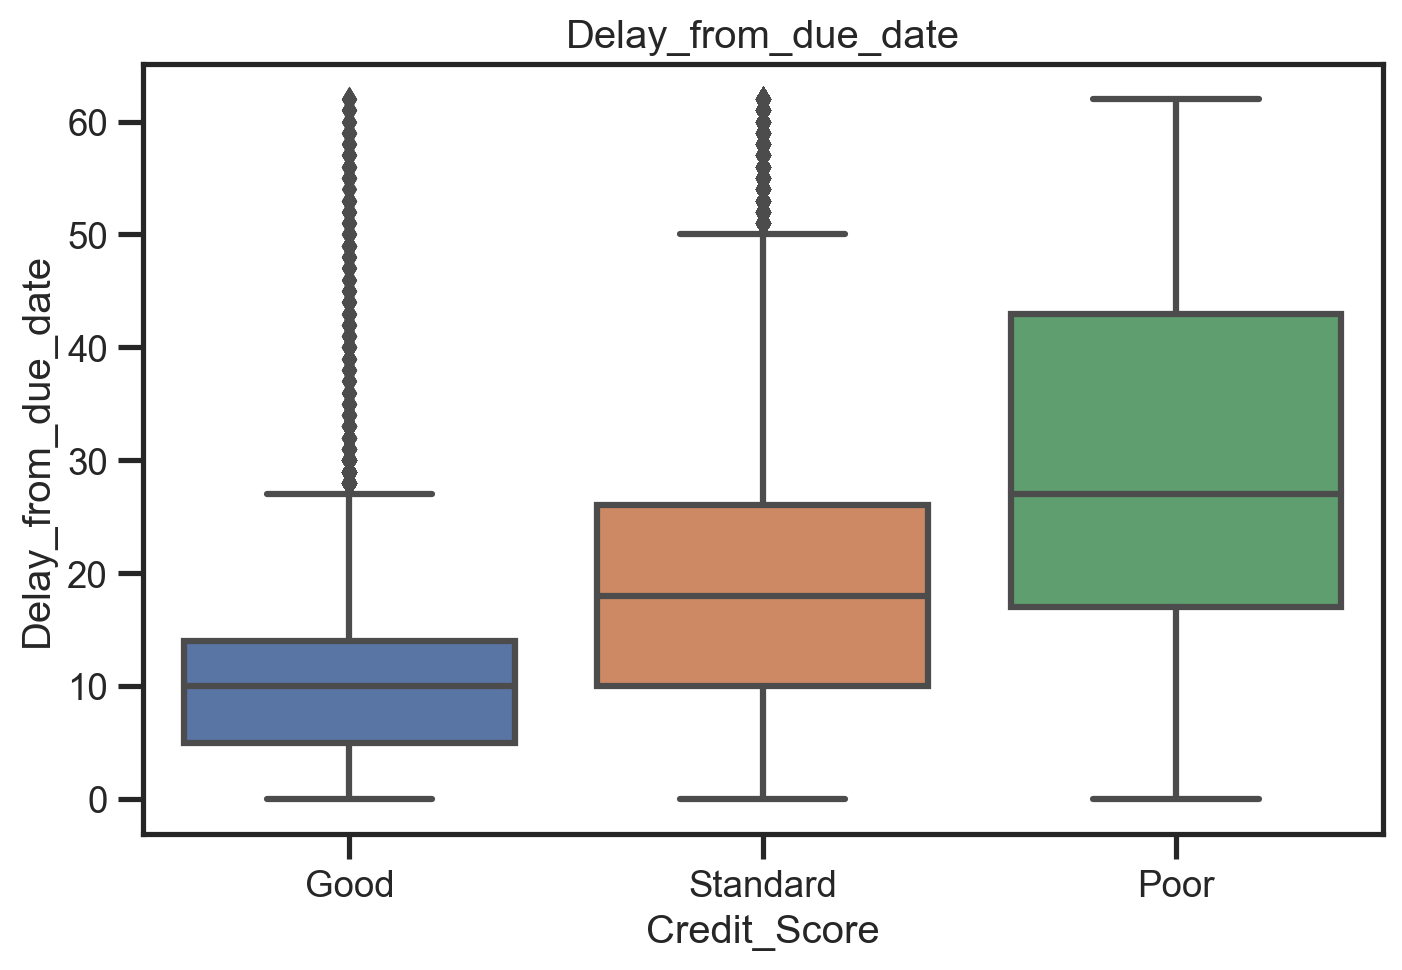

In [30]:
plot_boxplot(df, 'Delay_from_due_date', 'Credit_Score')

Number of delays from due date on credit repayment also have some impacts on credit score catgories. The longer the delay days from the due date the negative effect it has oon a person's credit score

In [31]:
df.groupby('Credit_Score')['Delay_from_due_date'].mean().sort_values(ascending=False)

Credit_Score
Poor        29.728809
Standard    19.759431
Good        10.958997
Name: Delay_from_due_date, dtype: float64

#### `Num_of_Delayed_Payment`

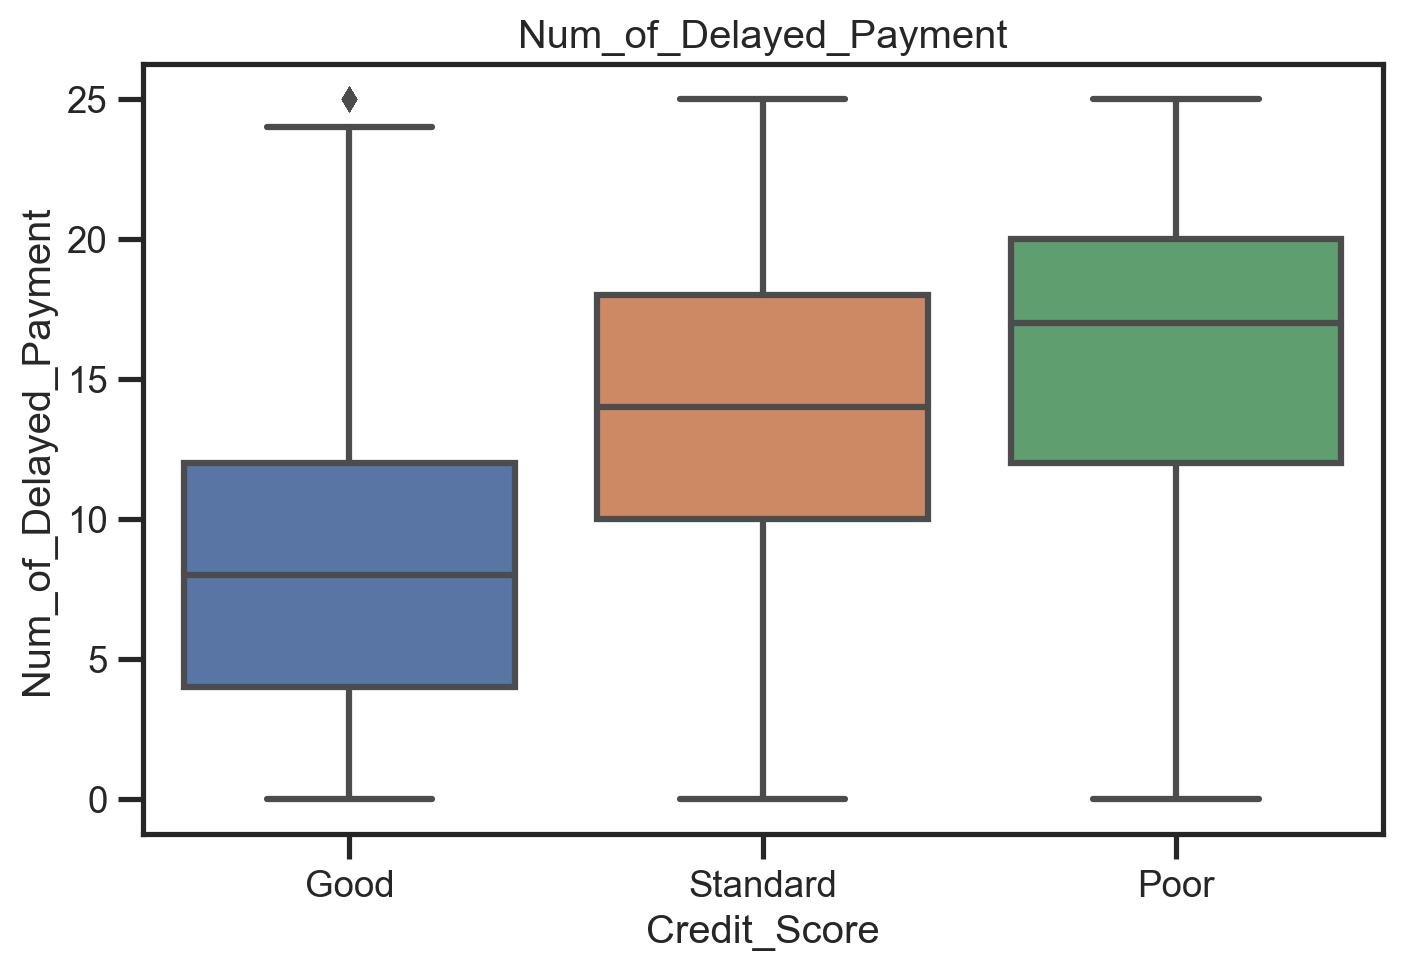

In [32]:
plot_boxplot(df,'Num_of_Delayed_Payment', 'Credit_Score')

<Axes: xlabel='Delay_from_due_date', ylabel='Num_of_Delayed_Payment'>

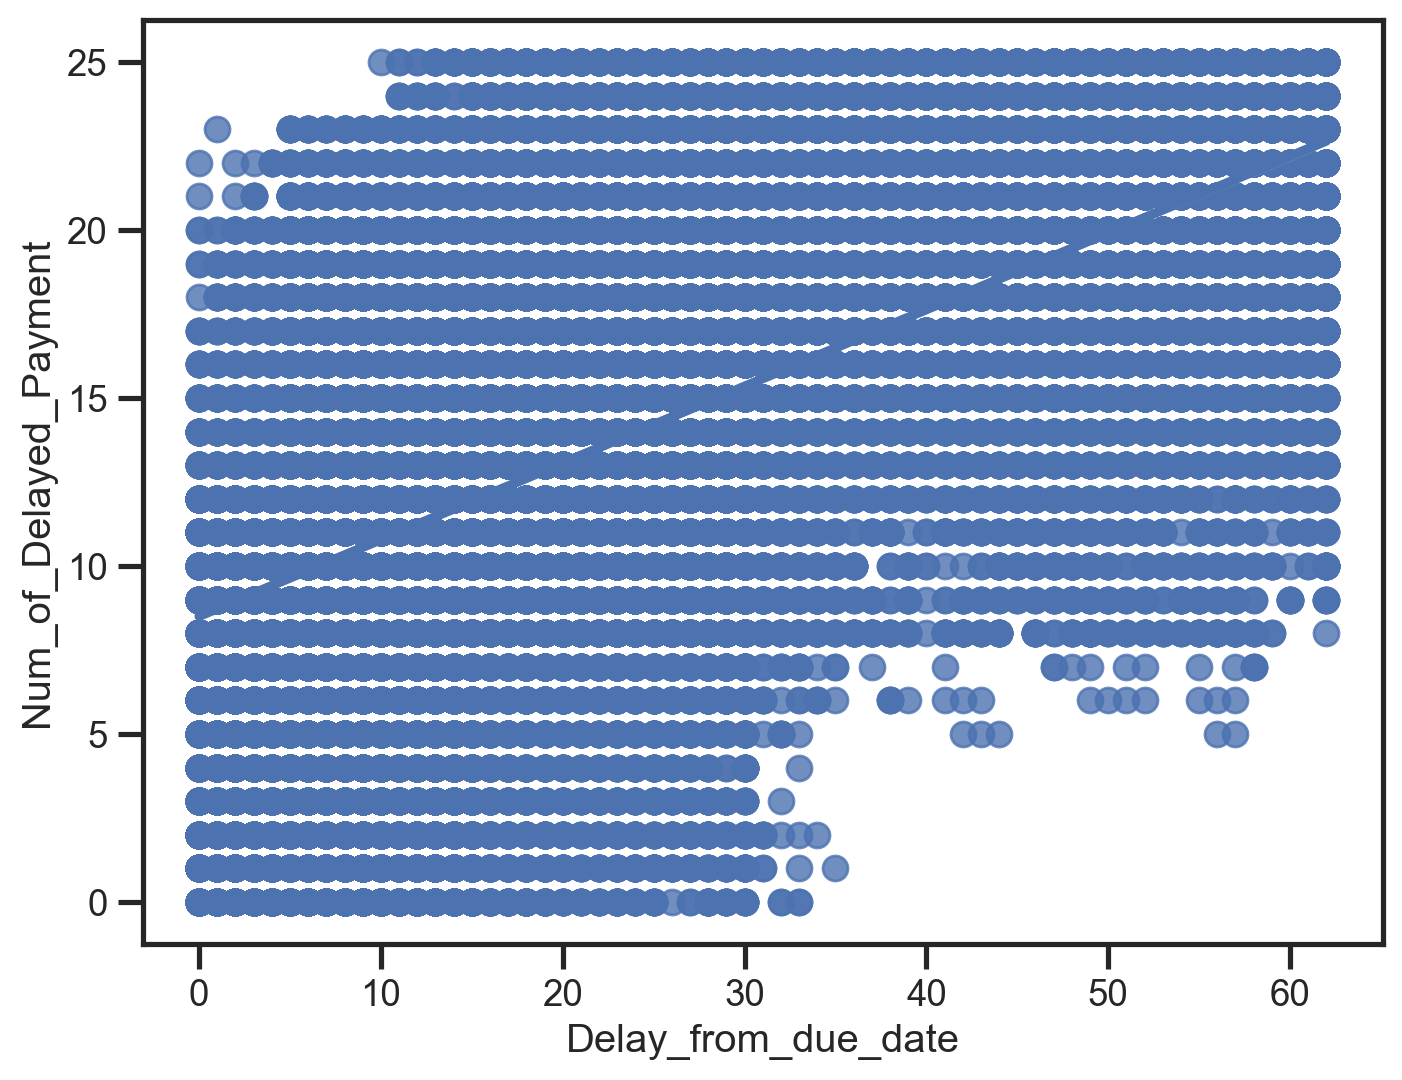

In [33]:
sns.regplot(y='Num_of_Delayed_Payment',x='Delay_from_due_date', data=df)

#### `Changed_Credit_Limit`

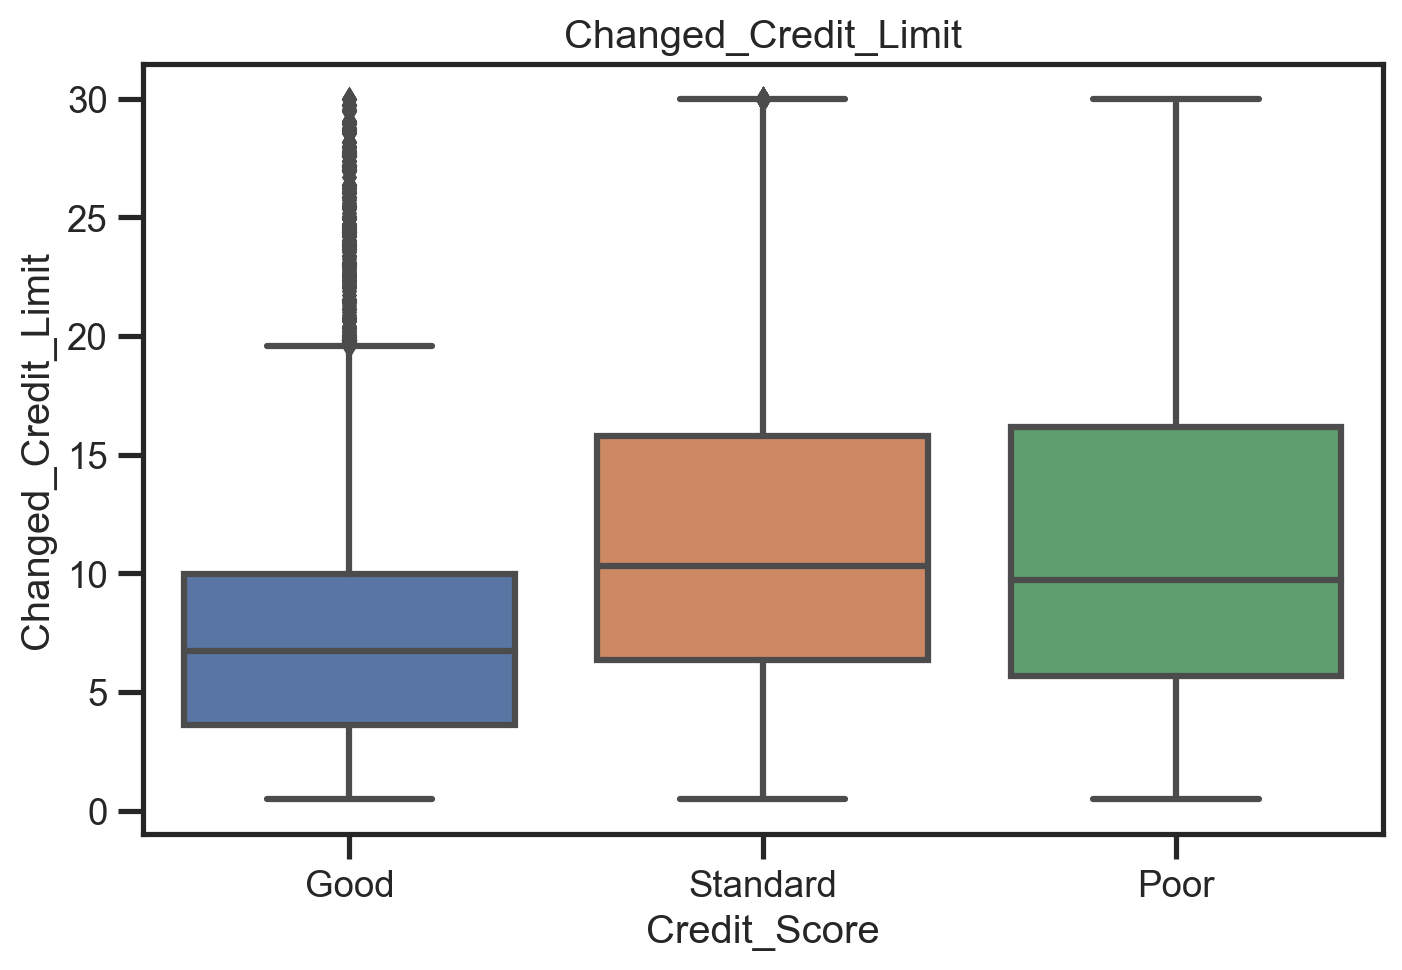

In [34]:
plot_boxplot(df,'Changed_Credit_Limit', 'Credit_Score')

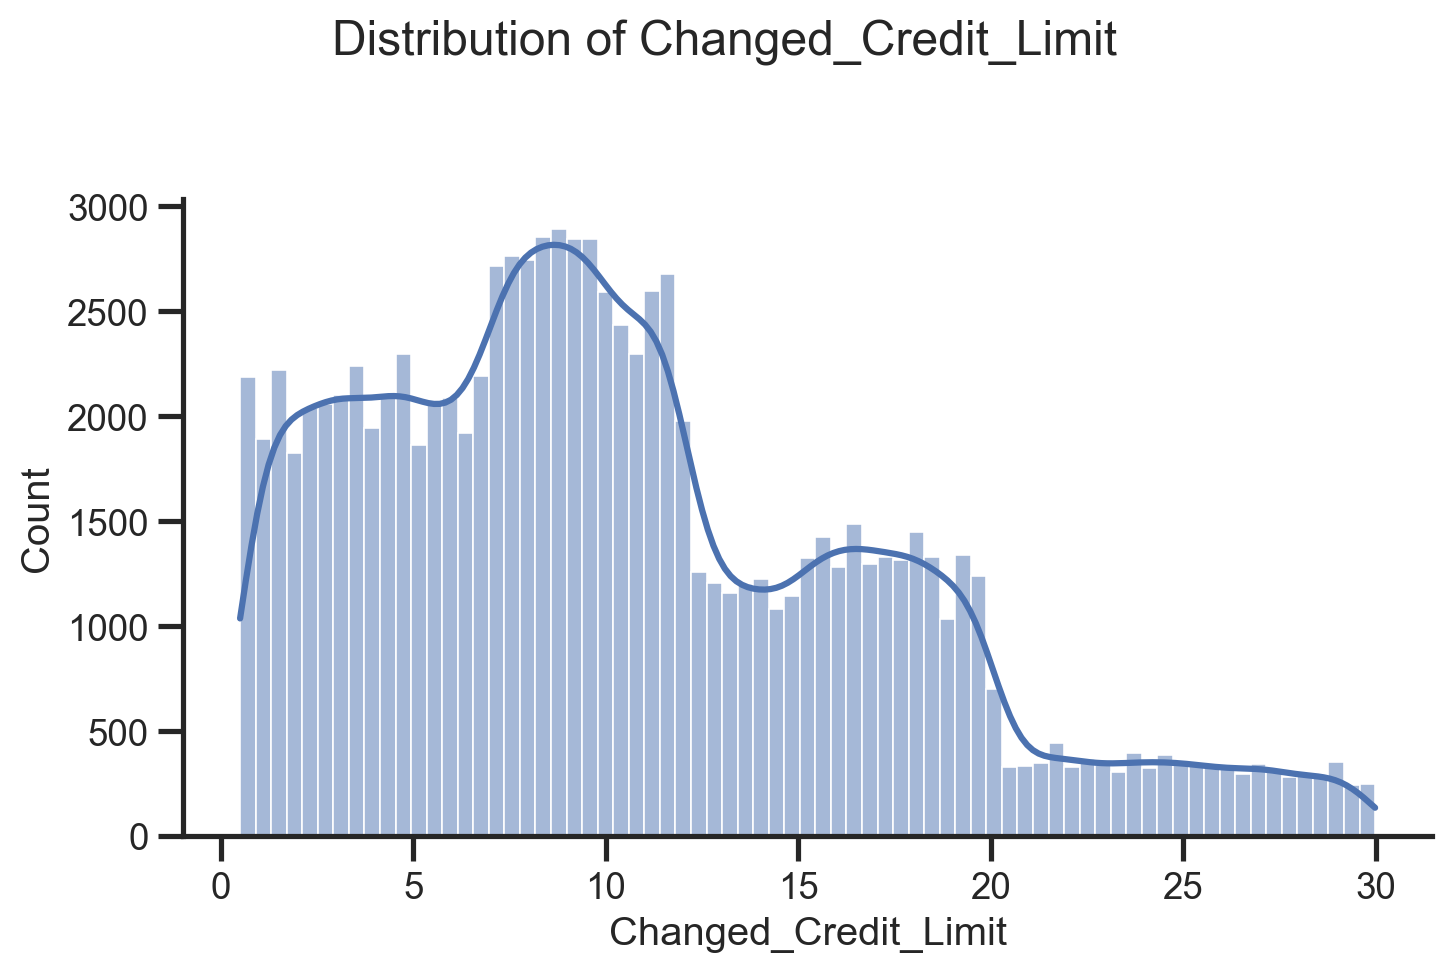

In [35]:
plot_displot(df, 'Changed_Credit_Limit')

In [36]:
df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [37]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [38]:
pd.Series(np.where(df['Credit_Mix']==df['Credit_Score'], 'Yes','No')).value_counts()

No     51791
Yes    48209
dtype: int64

#### `Changed_Credit_Limit`

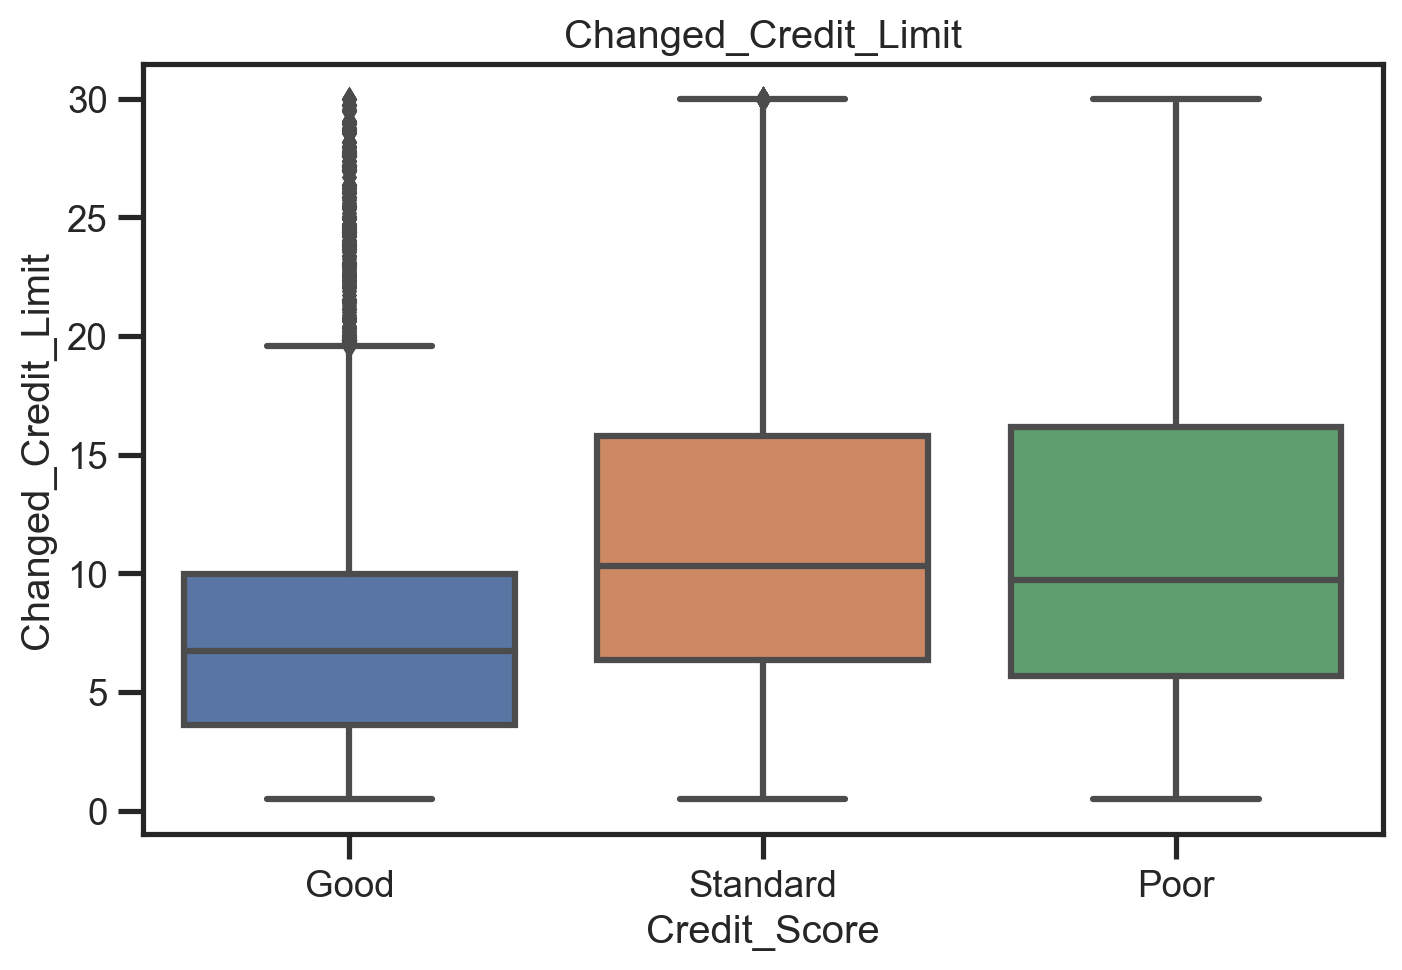

In [39]:
plot_boxplot(df,'Changed_Credit_Limit','Credit_Score')

#### `Num_Credit_Inquiries`

In [40]:
df['Num_Credit_Inquiries']

ID
5634      4.0
5635      4.0
5636      4.0
5637      4.0
5638      4.0
         ... 
155625    3.0
155626    3.0
155627    3.0
155628    3.0
155629    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

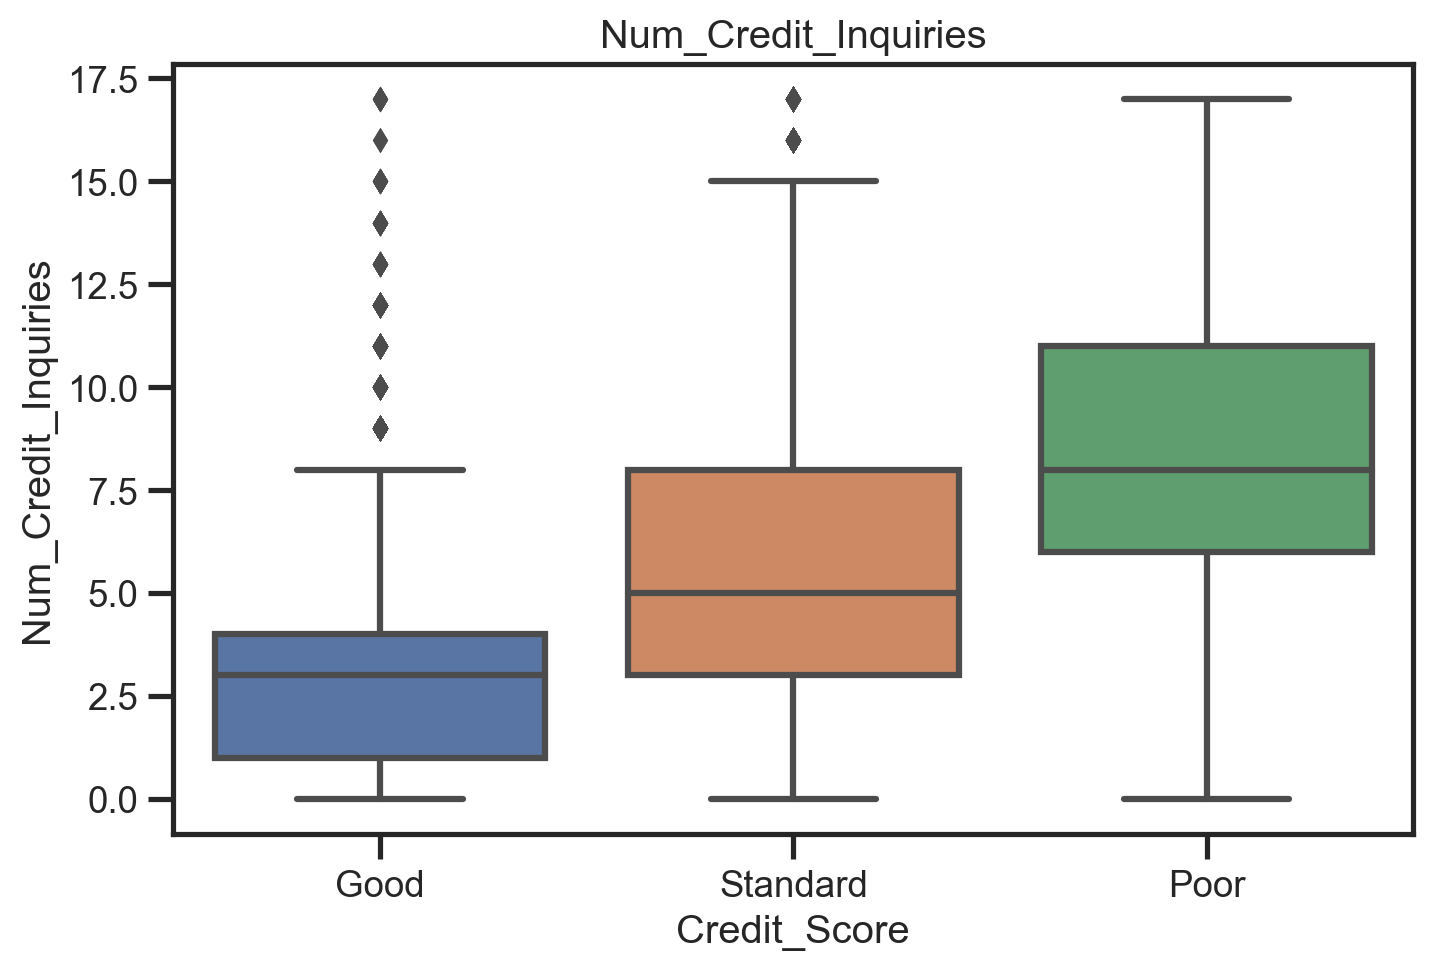

In [41]:
plot_boxplot(df,'Num_Credit_Inquiries','Credit_Score')

#### `Outstanding_Debt`

In [42]:
df.groupby('Credit_Score')['Outstanding_Debt'].mean()

Credit_Score
Good         801.256324
Poor        2081.473157
Standard    1278.419552
Name: Outstanding_Debt, dtype: float64

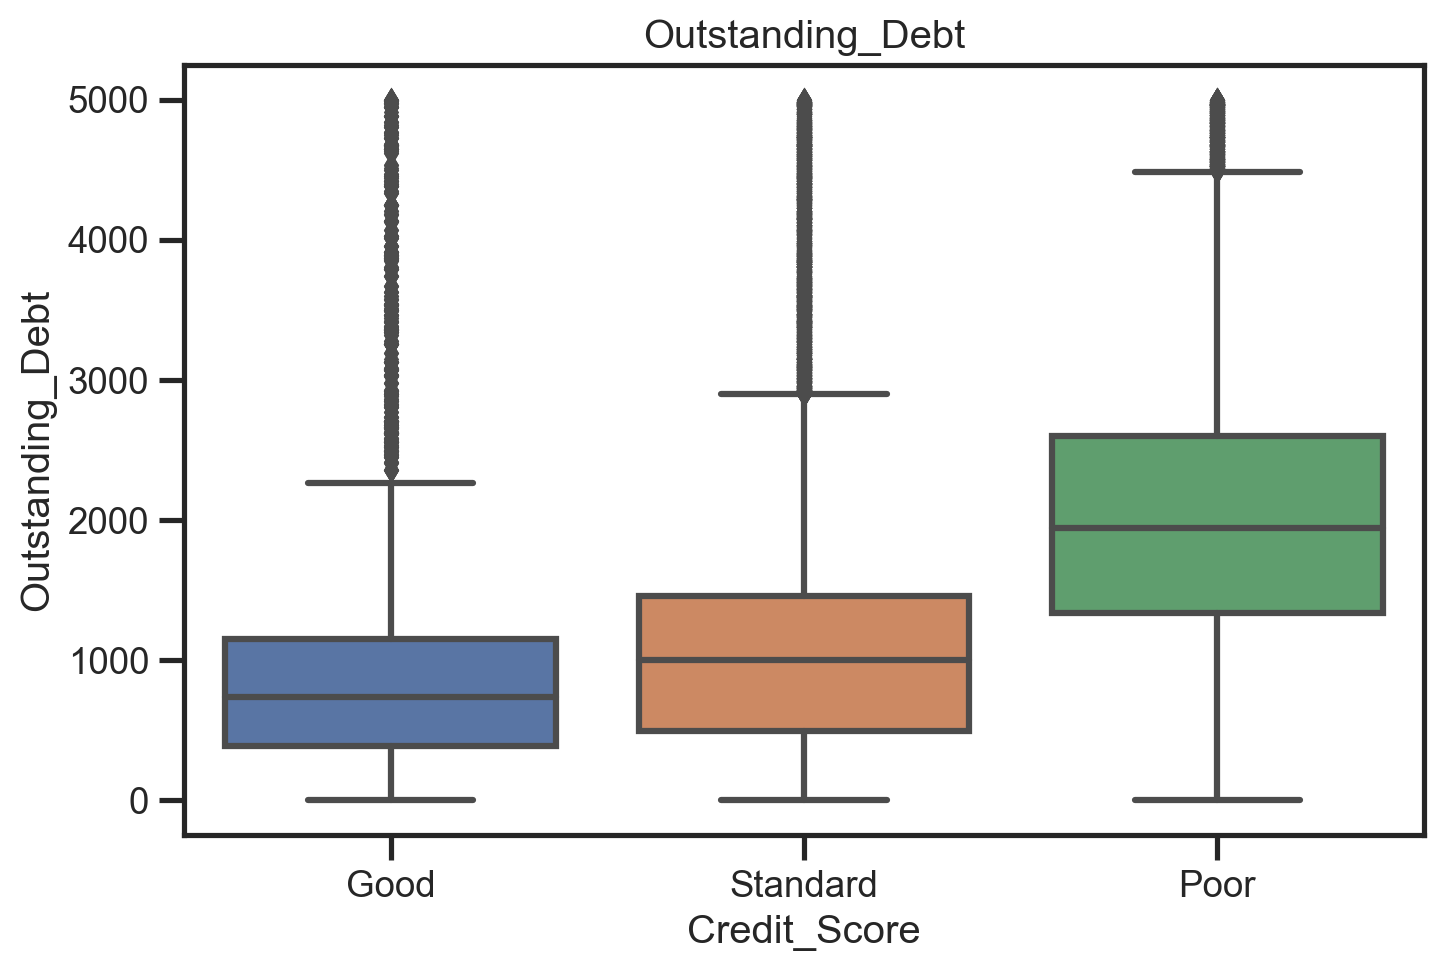

In [43]:
plot_boxplot(df,'Outstanding_Debt','Credit_Score')

#### `Credit_History_Age`

In [44]:
print(df['Credit_History_Age'].max())
print(df['Credit_History_Age'].min())

404.0
1.0


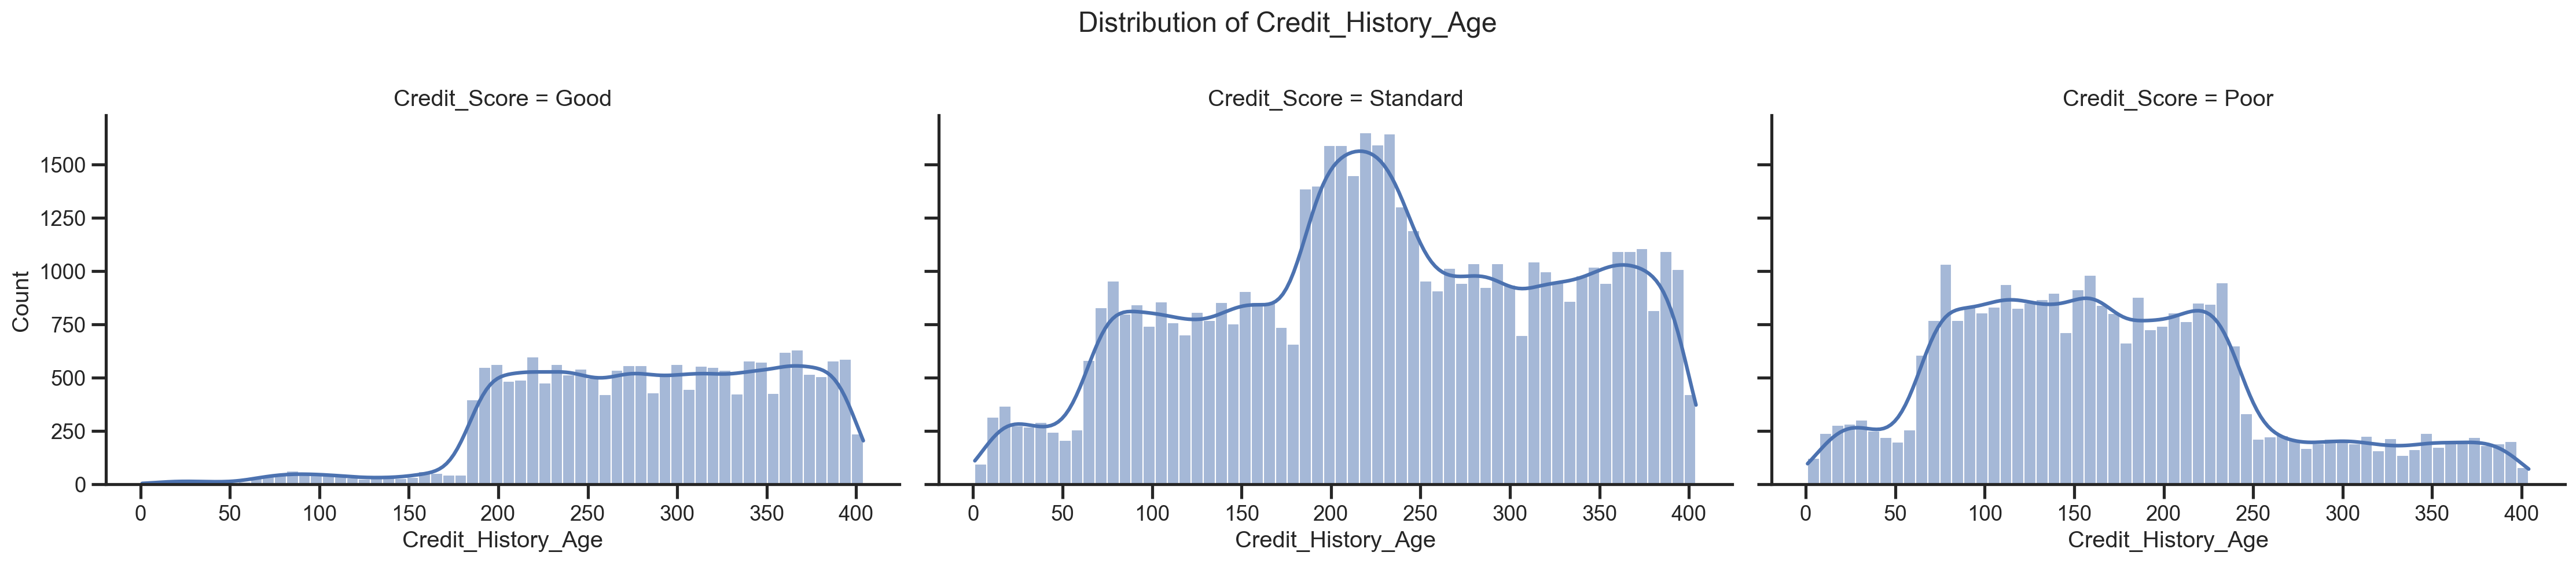

In [45]:
plot_displot(df,'Credit_History_Age', 'Credit_Score')

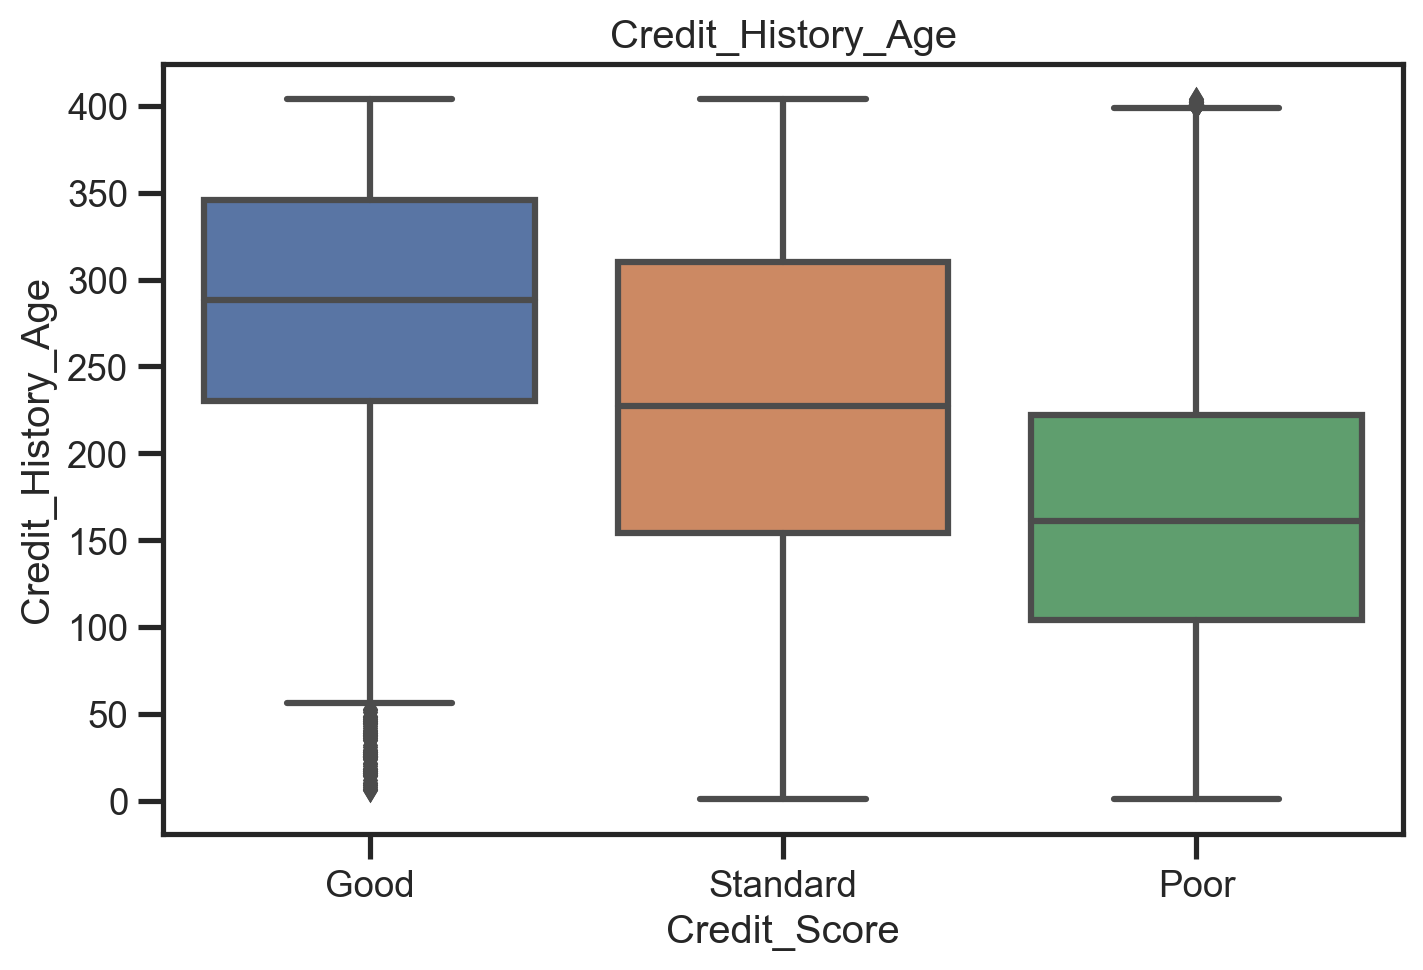

In [46]:
plot_boxplot(df,'Credit_History_Age','Credit_Score')

#### `Payment_of_Min_Amount`

In [47]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

<Axes: ylabel='Credit_Score,Payment_of_Min_Amount'>

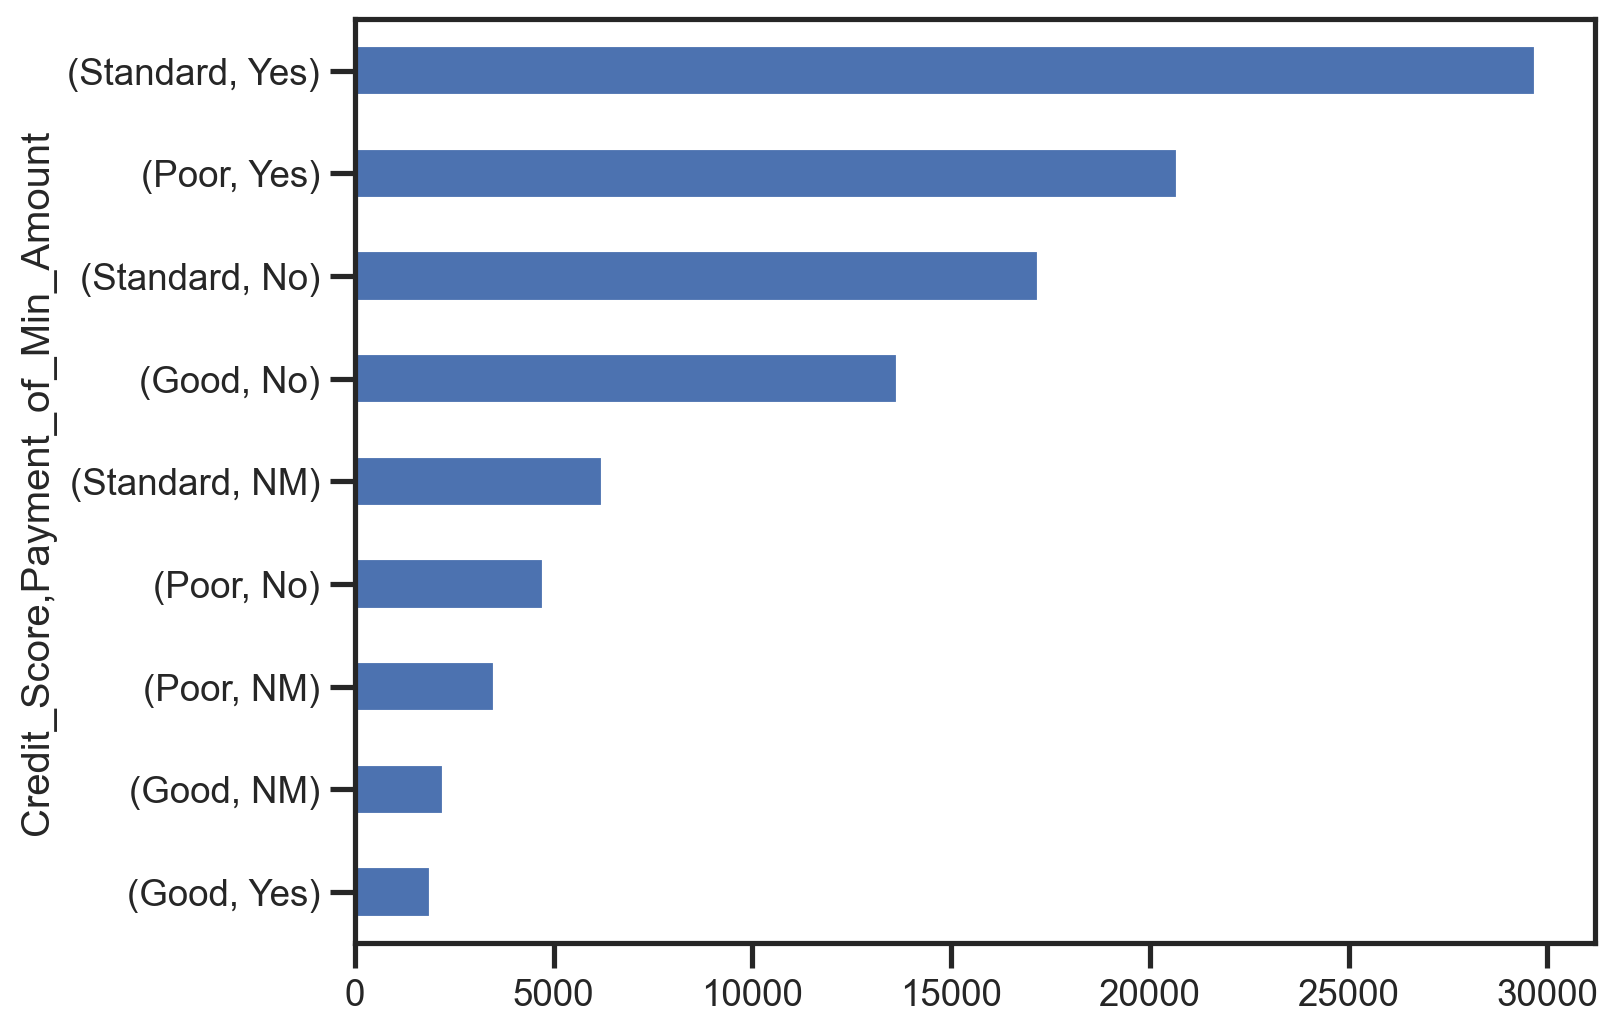

In [48]:
df.groupby('Credit_Score')['Payment_of_Min_Amount'].value_counts().sort_values(ascending=True).plot(kind='barh')

#### `Total_EMI_per_month`

In [49]:
df.groupby('Credit_Score')['Total_EMI_per_month'].mean()

Credit_Score
Good        121.691019
Poor        111.198326
Standard    101.099865
Name: Total_EMI_per_month, dtype: float64

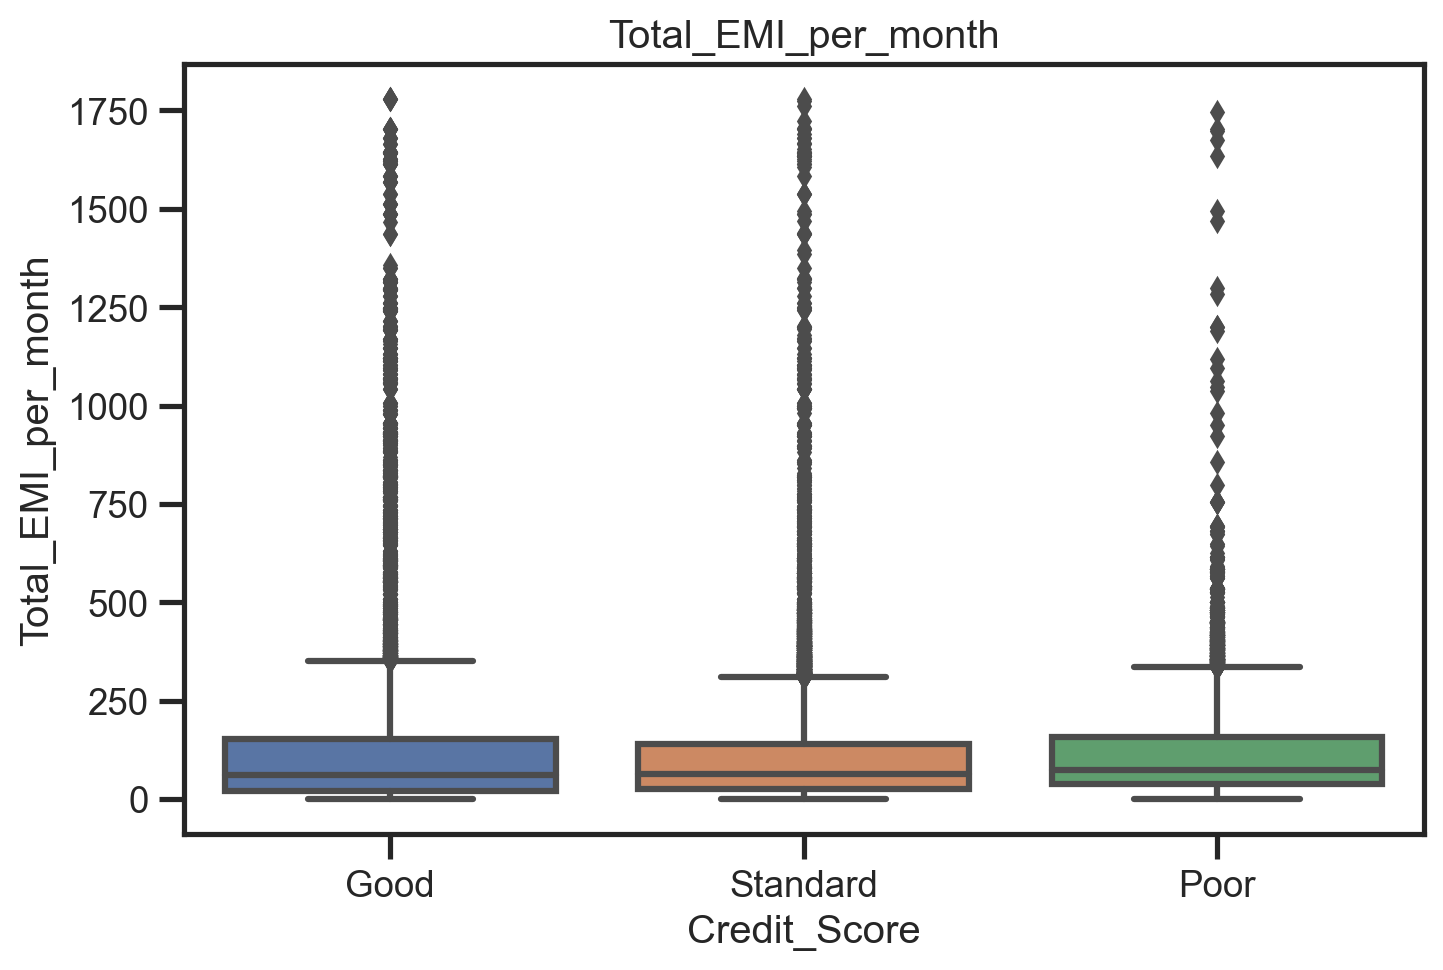

In [50]:
plot_boxplot(df,'Total_EMI_per_month','Credit_Score')

EMI per month doesn't have much eeffect on credit score

#### `Amount_invested_monthly`

In [51]:
df.groupby('Credit_Score')['Amount_invested_monthly'].mean()

Credit_Score
Good        67.417611
Poor        47.033019
Standard    55.371927
Name: Amount_invested_monthly, dtype: float64

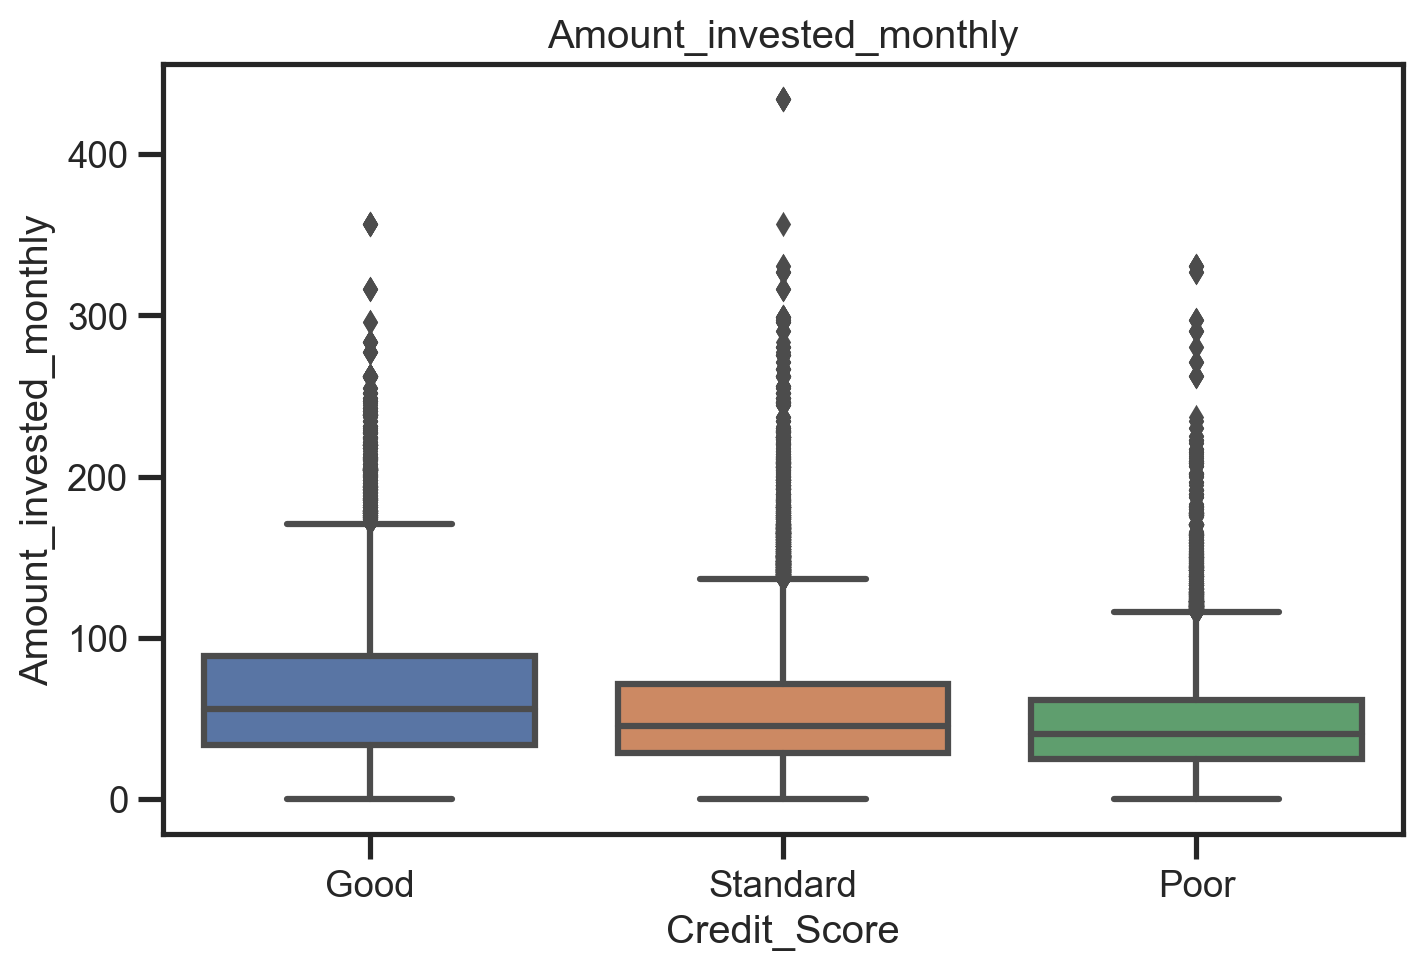

In [52]:
plot_boxplot(df,'Amount_invested_monthly','Credit_Score')

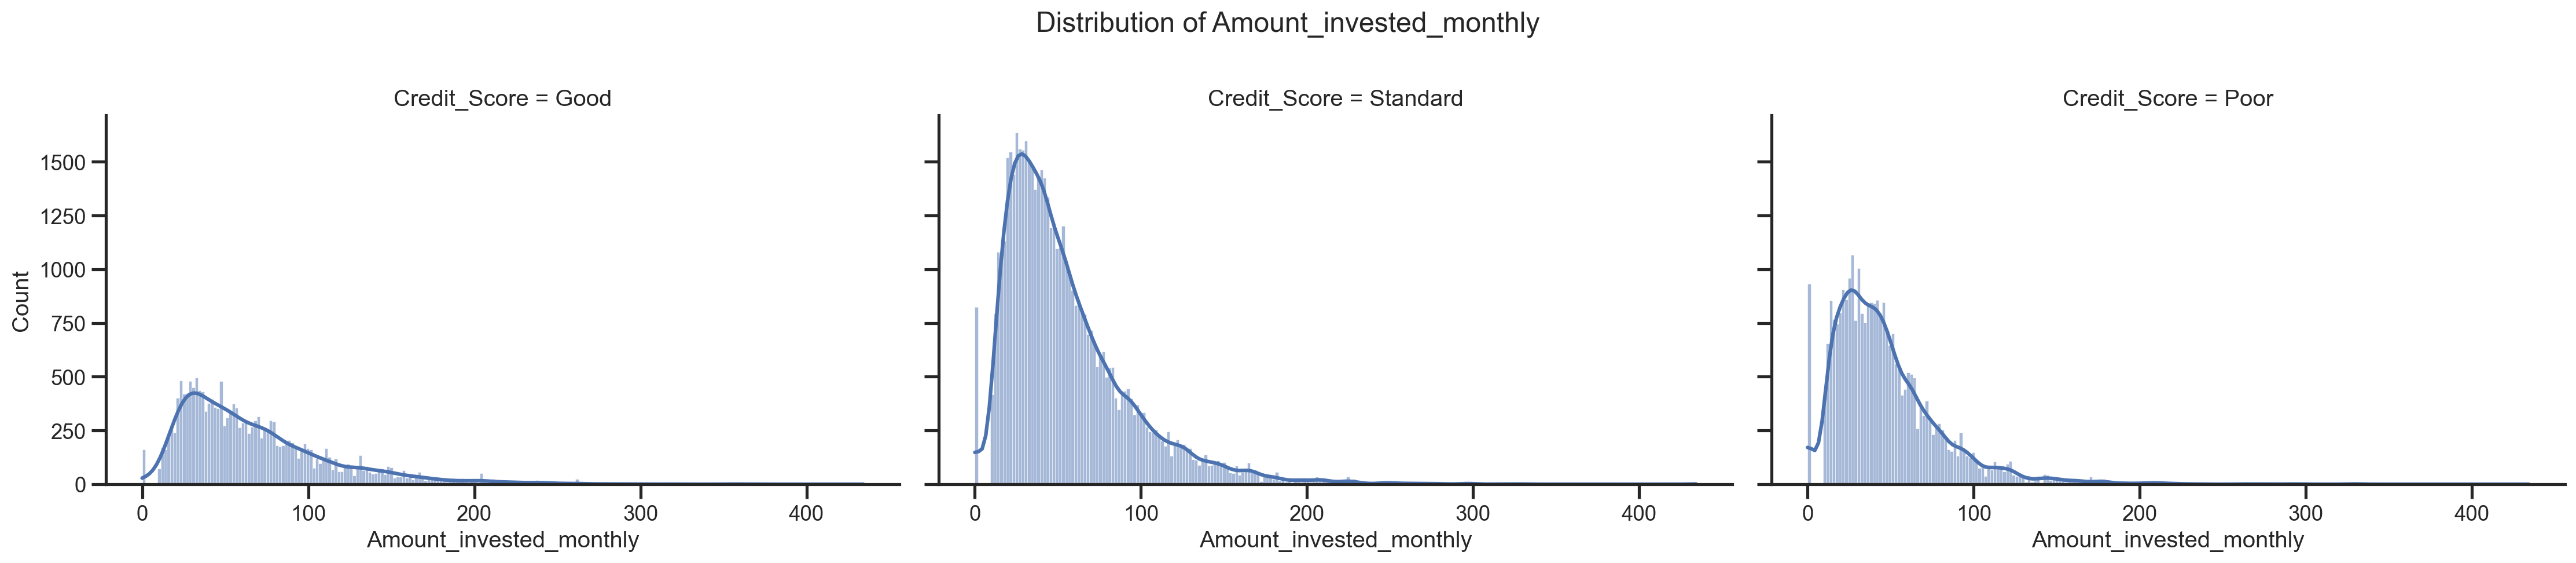

In [53]:
plot_displot(df,'Amount_invested_monthly','Credit_Score')

####  `Payment_Behaviour`

In [54]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

<Axes: ylabel='Credit_Score,Payment_Behaviour'>

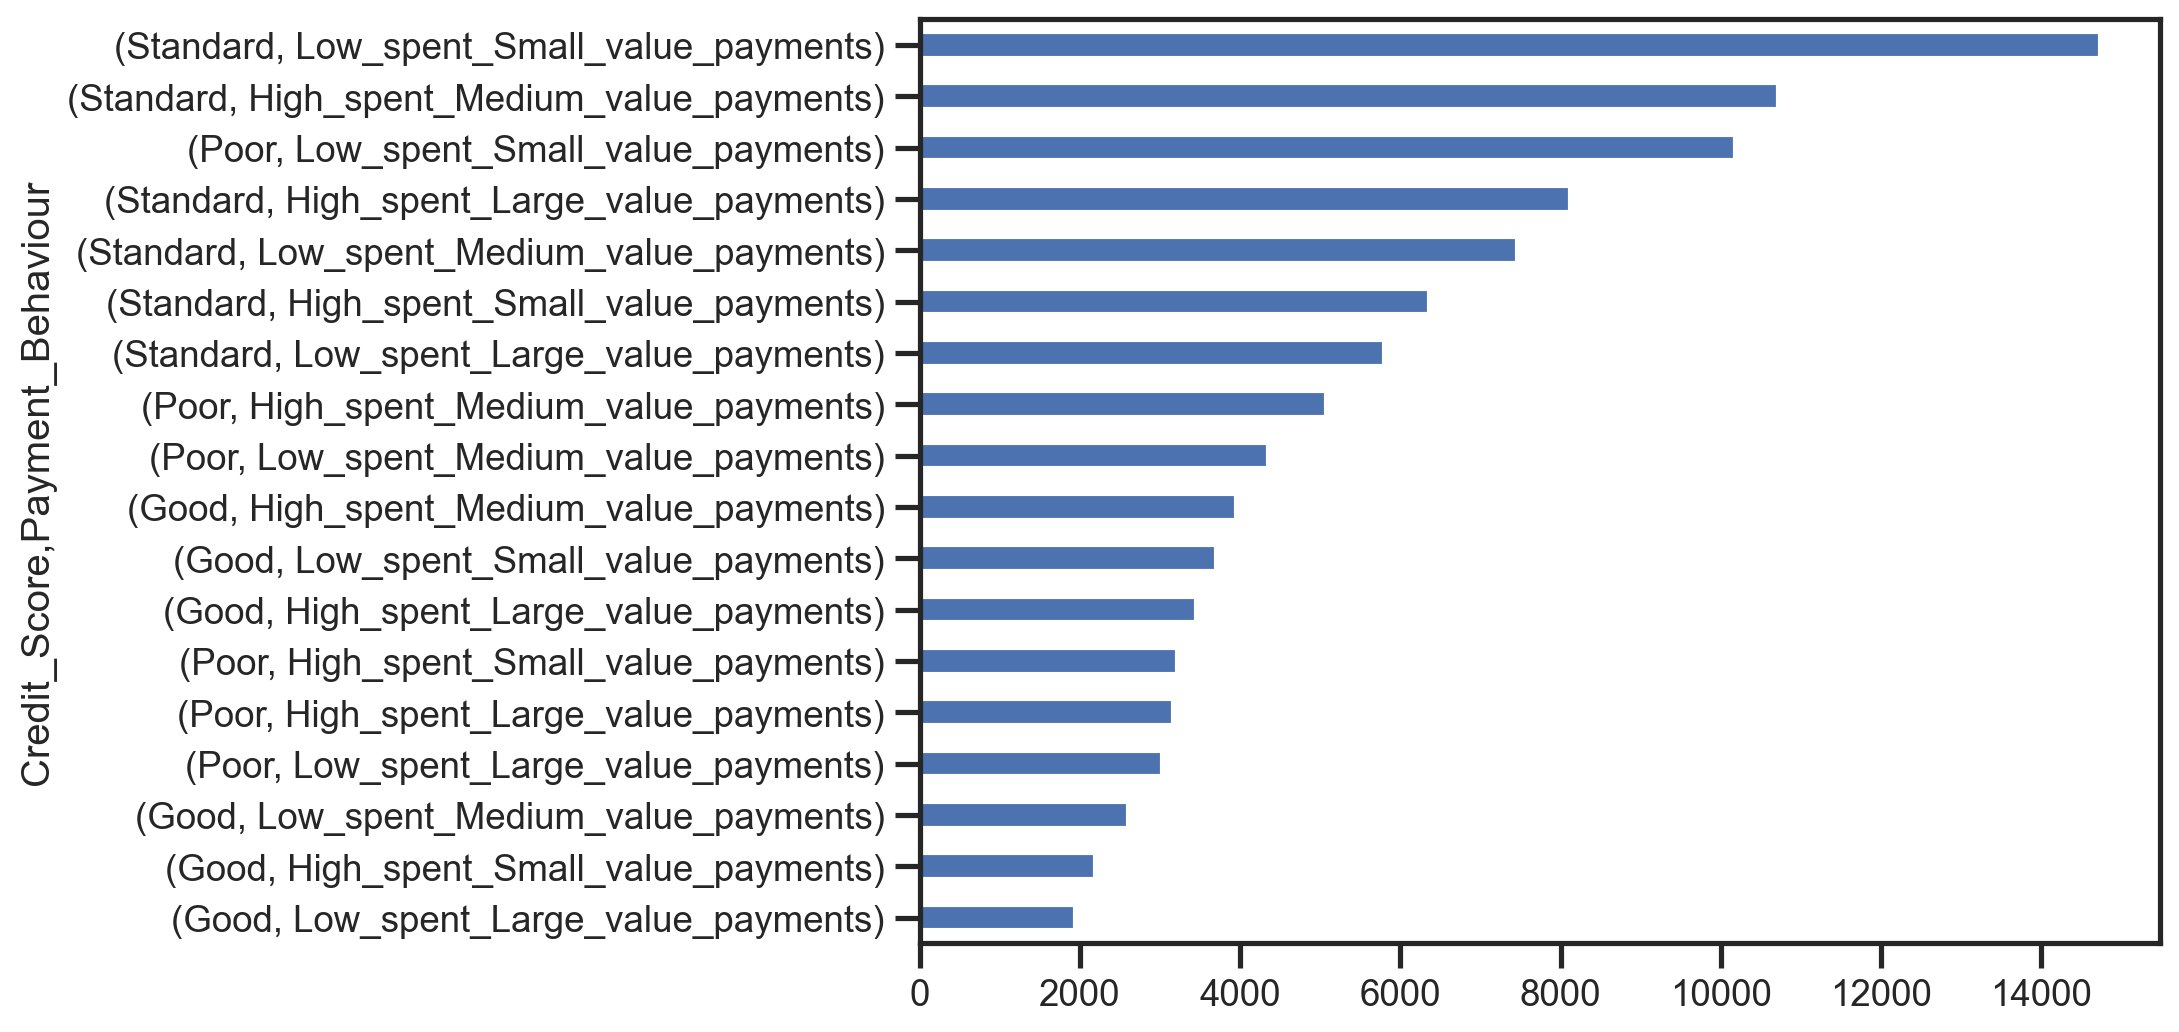

In [55]:
df.groupby('Credit_Score')['Payment_Behaviour'].value_counts().sort_values(ascending=True).plot(kind='barh')

#### `Monthly_Balance`

In [56]:
df.groupby('Credit_Score')['Monthly_Balance'].mean()

Credit_Score
Good        456.691556
Poor        339.212601
Standard    400.409496
Name: Monthly_Balance, dtype: float64

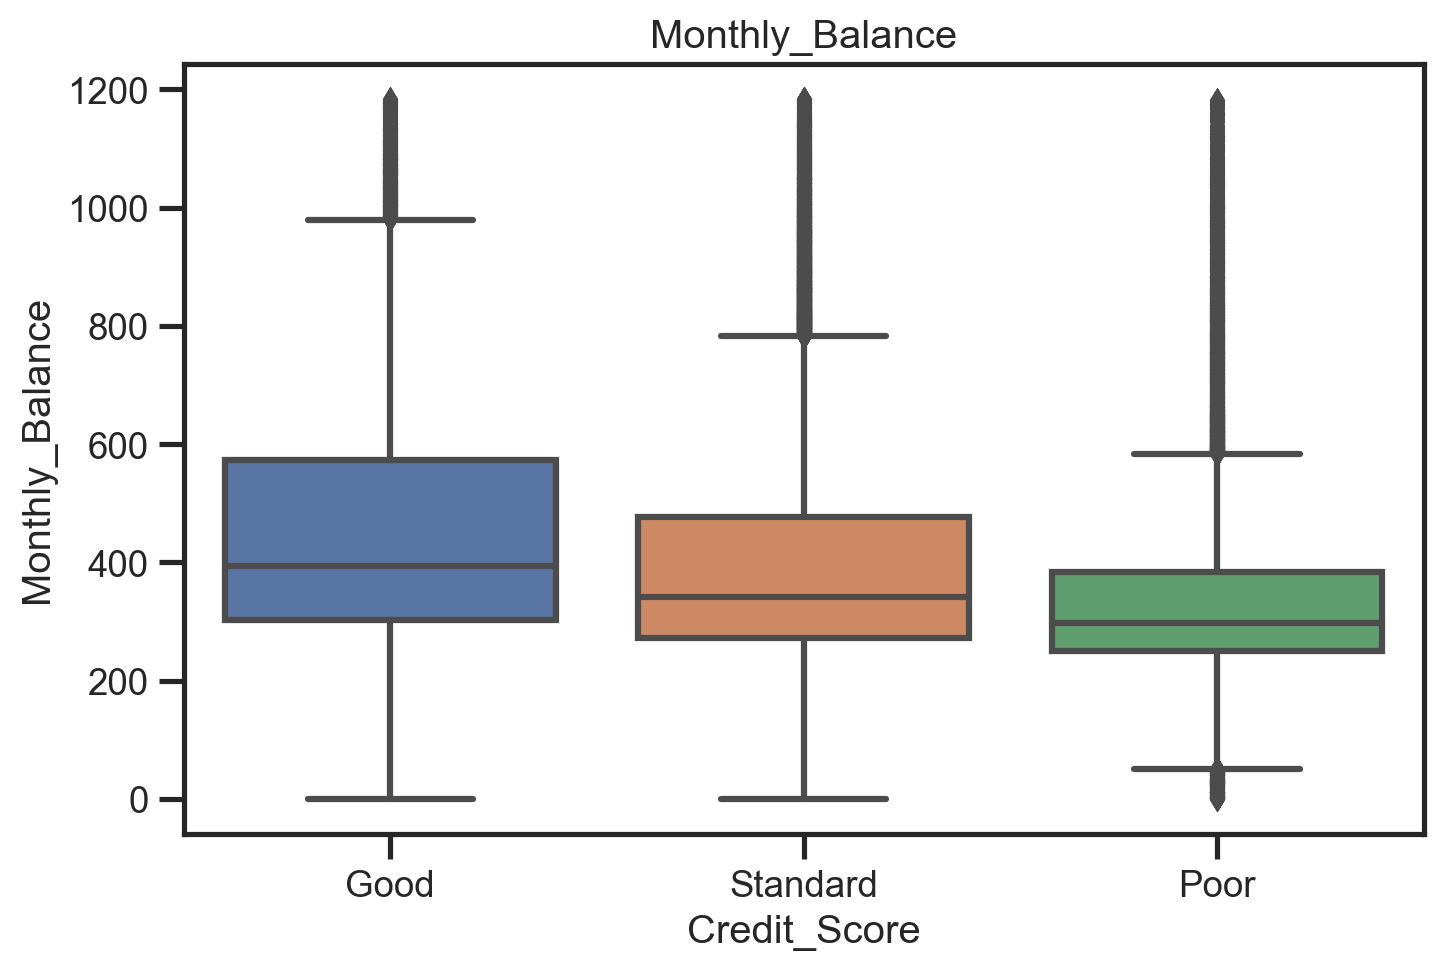

In [57]:
plot_boxplot(df,'Monthly_Balance','Credit_Score')

### `Credit Utilization Score`

In [61]:
df.groupby('Credit_Score')['Credit_Utilization_Ratio'].mean()

Credit_Score
Good        32.686107
Poor        31.986146
Standard    32.313820
Name: Credit_Utilization_Ratio, dtype: float64

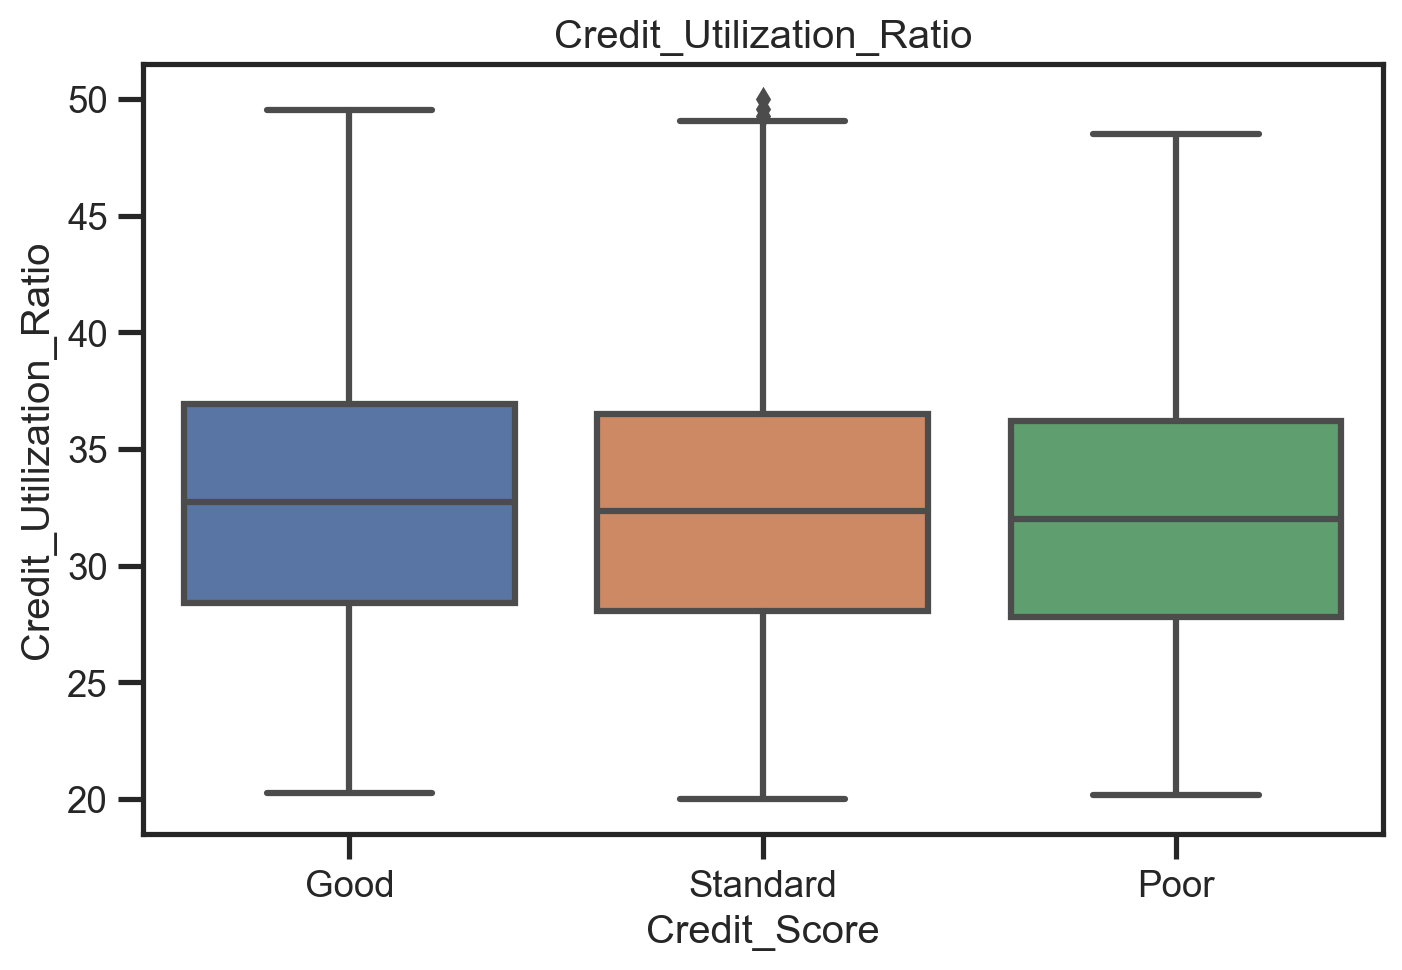

In [62]:
plot_boxplot(df,'Credit_Utilization_Ratio','Credit_Score')

In [58]:
df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
